In [5]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# load the weather data
weather_data = pd.read_csv("./weather_classification_data.csv")
weather_data.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3.0,83,6.0,66.0,overcast,999.44,0,Winter,1.0,mountain,Snowy
9,28.0,74,8.5,107.0,clear,1012.13,8,Winter,7.5,coastal,Sunny


In [7]:
weather_data.tail(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
13190,30.0,24,3.5,16.0,partly cloudy,1017.54,11,Summer,6.5,mountain,Sunny
13191,27.0,48,6.5,14.0,clear,1029.37,8,Summer,8.0,inland,Sunny
13192,31.0,24,8.0,5.0,clear,1029.61,8,Summer,9.0,inland,Sunny
13193,-5.0,65,15.5,50.0,overcast,982.57,1,Winter,5.0,inland,Snowy
13194,29.0,62,13.0,17.0,overcast,1002.81,2,Spring,5.0,coastal,Cloudy
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy
13199,-5.0,38,0.0,92.0,overcast,1015.37,5,Autumn,10.0,mountain,Rainy


In [8]:
weather_data.sample(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
9145,14.0,62,6.0,96.0,overcast,1006.55,3,Autumn,4.0,mountain,Rainy
10303,25.0,70,6.0,16.0,partly cloudy,1018.75,2,Autumn,7.5,coastal,Cloudy
12023,-9.0,90,10.0,98.0,partly cloudy,996.55,0,Winter,1.5,mountain,Snowy
6920,22.0,57,7.5,11.0,overcast,1004.21,4,Winter,8.0,mountain,Cloudy
13120,2.0,72,15.0,99.0,overcast,998.03,1,Winter,4.5,mountain,Snowy
11473,13.0,75,18.0,61.0,overcast,1017.78,0,Autumn,4.5,coastal,Rainy
4039,11.0,32,12.5,28.0,overcast,1162.39,12,Winter,7.5,inland,Rainy
9154,30.0,79,5.0,30.0,partly cloudy,1000.72,4,Autumn,5.5,inland,Cloudy
213,19.0,97,9.0,56.0,overcast,1015.74,3,Spring,2.0,mountain,Rainy
9128,9.0,109,8.5,84.0,overcast,993.99,13,Winter,4.5,inland,Snowy


## Data Validation and Cleaning


In [10]:
# Check number of columns and rows
rows = weather_data.shape[0]
cols = weather_data.shape[1]
print(f"This data has {rows} rows and {cols} columns")

# Check for total null values
null_values = weather_data.isnull().sum().sum()
print(f"There are {null_values} null_values")


This data has 13200 rows and 11 columns
There are 0 null_values


## Analysis

In [12]:
# Overview
described_data = weather_data.describe()
described_data

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [13]:
# Temperature values
avg_temp = described_data.iloc[1, 0]
min_temp = described_data.iloc[3, 0]
max_temp = described_data.iloc[-1, 0]
print(f"The averege temperature is {avg_temp}, minimum temperature {min_temp}, and maximum temperature {max_temp} degree celsius")

# Humidity values
avg_hum = described_data.iloc[1, 1]
min_hum = described_data.iloc[3, 1]
max_hum = described_data.iloc[-1, 1]
print(f"The averege humidity is {avg_hum}%, minimum humidity {min_hum}%, and maximum humidity {max_hum}%")

# Windspeed values
avg_ws = described_data.iloc[1, 2]
min_ws = described_data.iloc[3, 2]
max_ws = described_data.iloc[-1, 2]
print(f"The averege wind speed is {avg_ws}km/h, minimum wind speed {min_ws}km/h, and maximum wind speed {max_ws}km/h")

# Precipitation Values
avg_pre = described_data.iloc[1, 3]
min_pre = described_data.iloc[3, 3]
max_pre = described_data.iloc[-1, 3]
print(f"The averege precipitation is {avg_pre}%, minimum precipitation {min_pre}%, and maximum precipitation {max_pre}%")

# Atmospheric Pressure Values
avg_atp = described_data.iloc[1, 4]
min_atp = described_data.iloc[3, 4]
max_atp = described_data.iloc[-1, 4]
print(f"The averege atmospheric pressure is {avg_atp}hPa, minimum atmospheric pressure {min_atp}hPa, and maximum atmospheric pressure {max_atp}hPa")

# UV index Values
avg_uvi = described_data.iloc[1, 5]
min_uvi = described_data.iloc[3, 5]
max_uvi = described_data.iloc[-1, 5]
print(f"The averege UV index is {avg_uvi}, minimum UV index {min_uvi}, and maximum UV index {max_uvi}")


# Visibility Values
avg_vis = described_data.iloc[1, 6]
min_vis = described_data.iloc[3, 6]
max_vis = described_data.iloc[-1, 6]
print(f"The averege visibility is {avg_vis}Km, minimum visibility {min_vis}Km, and maximum visibility {max_vis}Km")




The averege temperature is 19.12757575757576, minimum temperature -25.0, and maximum temperature 109.0 degree celsius
The averege humidity is 68.71083333333333%, minimum humidity 20.0%, and maximum humidity 109.0%
The averege wind speed is 9.83219696969697km/h, minimum wind speed 0.0km/h, and maximum wind speed 48.5km/h
The averege precipitation is 53.644393939393936%, minimum precipitation 0.0%, and maximum precipitation 109.0%
The averege atmospheric pressure is 1005.8278962121212hPa, minimum atmospheric pressure 800.12hPa, and maximum atmospheric pressure 1199.21hPa
The averege UV index is 4.005757575757576, minimum UV index 0.0, and maximum UV index 14.0
The averege visibility is 5.462916666666667Km, minimum visibility 0.0Km, and maximum visibility 20.0Km


In [14]:
weather_data.head(5)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


## Weather metrics grouped by Weather Type

In [16]:
# Range of Values by weather type
# Temperature
weather_mean_temp = weather_data.groupby('Weather Type')['Temperature'].mean()
weather_max_temp = weather_data.groupby('Weather Type')['Temperature'].max()
weather_min_temp = weather_data.groupby('Weather Type')['Temperature'].min()
print(f"Average Temperatures recorded based on Weather type (in degree celsius): \n1. Cloudy: {weather_mean_temp[0]:.2f}\n2. Rainy: {weather_mean_temp[1]:.2f}\n3. Snowy: {weather_mean_temp[2]:.2f}\n4. Sunny: {weather_mean_temp[3]:.2f}")
print(f"Maximum Temperatures recorded based on Weather type (in degree celsius): \n1. Cloudy: {weather_max_temp[0]:.2f}\n2. Rainy: {weather_max_temp[1]:.2f}\n3. Snowy: {weather_max_temp[2]:.2f}\n4. Sunny: {weather_max_temp[3]:.2f}")
print(f"Minimum Temperatures recorded based on Weather type (in degree celsius): \n1. Cloudy: {weather_min_temp[0]:.2f}\n2. Rainy: {weather_min_temp[1]:.2f}\n3. Snowy: {weather_min_temp[2]:.2f}\n4. Sunny: {weather_min_temp[3]:.2f}")


Average Temperatures recorded based on Weather type (in degree celsius): 
1. Cloudy: 22.82
2. Rainy: 22.79
3. Snowy: -1.53
4. Sunny: 32.43
Maximum Temperatures recorded based on Weather type (in degree celsius): 
1. Cloudy: 84.00
2. Rainy: 84.00
3. Snowy: 49.00
4. Sunny: 109.00
Minimum Temperatures recorded based on Weather type (in degree celsius): 
1. Cloudy: -20.00
2. Rainy: -20.00
3. Snowy: -25.00
4. Sunny: -20.00


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\116901263.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average Temperatures recorded based on Weather type (in degree celsius): \n1. Cloudy: {weather_mean_temp[0]:.2f}\n2. Rainy: {weather_mean_temp[1]:.2f}\n3. Snowy: {weather_mean_temp[2]:.2f}\n4. Sunny: {weather_mean_temp[3]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\116901263.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum Temperatures recorded based on Weather type (in degree celsius): \n1. Cloudy: {weather_max_temp[0]:.2f}\n2. Rainy: {weather_max_tem

In [17]:
# Humidity
weather_mean_hum = weather_data.groupby('Weather Type')['Humidity'].mean()
weather_max_hum = weather_data.groupby('Weather Type')['Humidity'].max()
weather_min_hum = weather_data.groupby('Weather Type')['Humidity'].min()
print(f"Average Humidity recorded based on Weather type (in %): \n1. Cloudy: {weather_mean_hum[0]:.2f}\n2. Rainy: {weather_mean_hum[1]:.2f}\n3. Snowy: {weather_mean_hum[2]:.2f}\n4. Sunny: {weather_mean_hum[3]:.2f}")
print(f"Maximum Humidity recorded based on Weather type (in %): \n1. Cloudy: {weather_max_hum[0]:.2f}\n2. Rainy: {weather_max_hum[1]:.2f}\n3. Snowy: {weather_max_hum[2]:.2f}\n4. Sunny: {weather_max_hum[3]:.2f}")
print(f"Minimum Humidity recorded based on Weather type (in %): \n1. Cloudy: {weather_min_hum[0]:.2f}\n2. Rainy: {weather_min_hum[1]:.2f}\n3. Snowy: {weather_min_hum[2]:.2f}\n4. Sunny: {weather_min_hum[3]:.2f}")


Average Humidity recorded based on Weather type (in %): 
1. Cloudy: 66.53
2. Rainy: 78.40
3. Snowy: 78.51
4. Sunny: 51.41
Maximum Humidity recorded based on Weather type (in %): 
1. Cloudy: 109.00
2. Rainy: 109.00
3. Snowy: 109.00
4. Sunny: 109.00
Minimum Humidity recorded based on Weather type (in %): 
1. Cloudy: 20.00
2. Rainy: 20.00
3. Snowy: 20.00
4. Sunny: 20.00


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\2580479123.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average Humidity recorded based on Weather type (in %): \n1. Cloudy: {weather_mean_hum[0]:.2f}\n2. Rainy: {weather_mean_hum[1]:.2f}\n3. Snowy: {weather_mean_hum[2]:.2f}\n4. Sunny: {weather_mean_hum[3]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\2580479123.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum Humidity recorded based on Weather type (in %): \n1. Cloudy: {weather_max_hum[0]:.2f}\n2. Rainy: {weather_max_hum[1]:.2f}\n3. Snowy: {weather_max_hum[

In [18]:
# windspeed
weather_mean_ws = weather_data.groupby('Weather Type')['Wind Speed'].mean()
weather_max_ws = weather_data.groupby('Weather Type')['Wind Speed'].max()
weather_min_ws = weather_data.groupby('Weather Type')['Wind Speed'].min()
print(f"Average Wind Speed recorded based on Weather type (in km/h): \n1. Cloudy: {weather_mean_ws[0]:.2f}\n2. Rainy: {weather_mean_ws[1]:.2f}\n3. Snowy: {weather_mean_ws[2]:.2f}\n4. Sunny: {weather_mean_ws[3]:.2f}")
print(f"Maximum Wind Speed recorded based on Weather type (in km/h): \n1. Cloudy: {weather_max_ws[0]:.2f}\n2. Rainy: {weather_max_ws[1]:.2f}\n3. Snowy: {weather_max_ws[2]:.2f}\n4. Sunny: {weather_max_ws[3]:.2f}")
print(f"Minimum Wind Speed recorded based on Weather type (in km/h): \n1. Cloudy: {weather_min_ws[0]:.2f}\n2. Rainy: {weather_min_ws[1]:.2f}\n3. Snowy: {weather_min_ws[2]:.2f}\n4. Sunny: {weather_min_ws[3]:.2f}")


Average Wind Speed recorded based on Weather type (in km/h): 
1. Cloudy: 8.60
2. Rainy: 13.68
3. Snowy: 10.98
4. Sunny: 6.07
Maximum Wind Speed recorded based on Weather type (in km/h): 
1. Cloudy: 36.00
2. Rainy: 47.50
3. Snowy: 48.50
4. Sunny: 24.50
Minimum Wind Speed recorded based on Weather type (in km/h): 
1. Cloudy: 0.00
2. Rainy: 0.00
3. Snowy: 0.00
4. Sunny: 0.00


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\3284611152.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average Wind Speed recorded based on Weather type (in km/h): \n1. Cloudy: {weather_mean_ws[0]:.2f}\n2. Rainy: {weather_mean_ws[1]:.2f}\n3. Snowy: {weather_mean_ws[2]:.2f}\n4. Sunny: {weather_mean_ws[3]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\3284611152.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum Wind Speed recorded based on Weather type (in km/h): \n1. Cloudy: {weather_max_ws[0]:.2f}\n2. Rainy: {weather_max_ws[1]:.2f}\n3. Snowy: {weather_max_

In [19]:
# Precipitation
weather_mean_pre = weather_data.groupby('Weather Type')['Precipitation (%)'].mean()
weather_max_pre = weather_data.groupby('Weather Type')['Precipitation (%)'].max()
weather_min_pre = weather_data.groupby('Weather Type')['Precipitation (%)'].min()
print(f"Average Precipitation recorded based on Weather type (in %): \n1. Cloudy: {weather_mean_pre[0]:.2f}\n2. Rainy: {weather_mean_pre[1]:.2f}\n3. Snowy: {weather_mean_pre[2]:.2f}\n4. Sunny: {weather_mean_pre[3]:.2f}")
print(f"Maximum Precipitation recorded based on Weather type (in %): \n1. Cloudy: {weather_max_pre[0]:.2f}\n2. Rainy: {weather_max_pre[1]:.2f}\n3. Snowy: {weather_max_pre[2]:.2f}\n4. Sunny: {weather_max_pre[3]:.2f}")
print(f"Minimum Precipitation recorded based on Weather type (in %): \n1. Cloudy: {weather_min_pre[0]:.2f}\n2. Rainy: {weather_min_pre[1]:.2f}\n3. Snowy: {weather_min_pre[2]:.2f}\n4. Sunny: {weather_min_pre[3]:.2f}")


Average Precipitation recorded based on Weather type (in %): 
1. Cloudy: 40.29
2. Rainy: 74.75
3. Snowy: 74.59
4. Sunny: 24.95
Maximum Precipitation recorded based on Weather type (in %): 
1. Cloudy: 109.00
2. Rainy: 109.00
3. Snowy: 109.00
4. Sunny: 109.00
Minimum Precipitation recorded based on Weather type (in %): 
1. Cloudy: 10.00
2. Rainy: 10.00
3. Snowy: 10.00
4. Sunny: 0.00


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\2328075128.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average Precipitation recorded based on Weather type (in %): \n1. Cloudy: {weather_mean_pre[0]:.2f}\n2. Rainy: {weather_mean_pre[1]:.2f}\n3. Snowy: {weather_mean_pre[2]:.2f}\n4. Sunny: {weather_mean_pre[3]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\2328075128.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum Precipitation recorded based on Weather type (in %): \n1. Cloudy: {weather_max_pre[0]:.2f}\n2. Rainy: {weather_max_pre[1]:.2f}\n3. Snowy: {weathe

In [20]:
# Atmospheric Pressure Values
weather_mean_atp = weather_data.groupby('Weather Type')['Atmospheric Pressure'].mean()
weather_max_atp = weather_data.groupby('Weather Type')['Atmospheric Pressure'].max()
weather_min_atp = weather_data.groupby('Weather Type')['Atmospheric Pressure'].min()
print(f"Average Atmospheric Pressure recorded based on Weather type (in hPa): \n1. Cloudy: {weather_mean_atp[0]:.2f}\n2. Rainy: {weather_mean_atp[1]:.2f}\n3. Snowy: {weather_mean_atp[2]:.2f}\n4. Sunny: {weather_mean_atp[3]:.2f}")
print(f"Maximum Atmospheric Pressure recorded based on Weather type (in hPa): \n1. Cloudy: {weather_max_atp[0]:.2f}\n2. Rainy: {weather_max_atp[1]:.2f}\n3. Snowy: {weather_max_atp[2]:.2f}\n4. Sunny: {weather_max_atp[3]:.2f}")
print(f"Minimum Atmospheric Pressure recorded based on Weather type (in hPa): \n1. Cloudy: {weather_min_atp[0]:.2f}\n2. Rainy: {weather_min_atp[1]:.2f}\n3. Snowy: {weather_min_atp[2]:.2f}\n4. Sunny: {weather_min_atp[3]:.2f}")


Average Atmospheric Pressure recorded based on Weather type (in hPa): 
1. Cloudy: 1010.17
2. Rainy: 1004.15
3. Snowy: 991.05
4. Sunny: 1017.94
Maximum Atmospheric Pressure recorded based on Weather type (in hPa): 
1. Cloudy: 1197.20
2. Rainy: 1198.85
3. Snowy: 1199.21
4. Sunny: 1198.41
Minimum Atmospheric Pressure recorded based on Weather type (in hPa): 
1. Cloudy: 800.12
2. Rainy: 804.06
3. Snowy: 800.23
4. Sunny: 800.82


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\1260173114.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average Atmospheric Pressure recorded based on Weather type (in hPa): \n1. Cloudy: {weather_mean_atp[0]:.2f}\n2. Rainy: {weather_mean_atp[1]:.2f}\n3. Snowy: {weather_mean_atp[2]:.2f}\n4. Sunny: {weather_mean_atp[3]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\1260173114.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum Atmospheric Pressure recorded based on Weather type (in hPa): \n1. Cloudy: {weather_max_atp[0]:.2f}\n2. Rainy: {weather_max_atp[1]:.2f}\

In [21]:
# UV Index
weather_mean_uvi = weather_data.groupby('Weather Type')['UV Index'].mean()
weather_max_uvi = weather_data.groupby('Weather Type')['UV Index'].max()
weather_min_uvi = weather_data.groupby('Weather Type')['UV Index'].min()
print(f"Average UV Index recorded based on Weather type: \n1. Cloudy: {weather_mean_uvi[0]:.2f}\n2. Rainy: {weather_mean_uvi[1]:.2f}\n3. Snowy: {weather_mean_uvi[2]:.2f}\n4. Sunny: {weather_mean_uvi[3]:.2f}")
print(f"Maximum UV Index recorded based on Weather type: \n1. Cloudy: {weather_max_uvi[0]:.2f}\n2. Rainy: {weather_max_uvi[1]:.2f}\n3. Snowy: {weather_max_uvi[2]:.2f}\n4. Sunny: {weather_max_uvi[3]:.2f}")
print(f"Minimum UV Index recorded based on Weather type: \n1. Cloudy: {weather_min_uvi[0]:.2f}\n2. Rainy: {weather_min_uvi[1]:.2f}\n3. Snowy: {weather_min_uvi[2]:.2f}\n4. Sunny: {weather_min_uvi[3]:.2f}")




Average UV Index recorded based on Weather type: 
1. Cloudy: 3.58
2. Rainy: 2.68
3. Snowy: 1.95
4. Sunny: 7.80
Maximum UV Index recorded based on Weather type: 
1. Cloudy: 14.00
2. Rainy: 14.00
3. Snowy: 14.00
4. Sunny: 14.00
Minimum UV Index recorded based on Weather type: 
1. Cloudy: 0.00
2. Rainy: 0.00
3. Snowy: 0.00
4. Sunny: 0.00


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\1639186377.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average UV Index recorded based on Weather type: \n1. Cloudy: {weather_mean_uvi[0]:.2f}\n2. Rainy: {weather_mean_uvi[1]:.2f}\n3. Snowy: {weather_mean_uvi[2]:.2f}\n4. Sunny: {weather_mean_uvi[3]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\1639186377.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum UV Index recorded based on Weather type: \n1. Cloudy: {weather_max_uvi[0]:.2f}\n2. Rainy: {weather_max_uvi[1]:.2f}\n3. Snowy: {weather_max_uvi[2]:.2f}\n4. Su

In [22]:
# Visibiltiy (km)
weather_mean_vis = weather_data.groupby('Weather Type')['Visibility (km)'].mean()
weather_max_vis = weather_data.groupby('Weather Type')['Visibility (km)'].max()
weather_min_vis = weather_data.groupby('Weather Type')['Visibility (km)'].min()
print(f"Average Visibility recorded based on Weather type (in km): \n1. Cloudy: {weather_mean_vis[0]:.2f}\n2. Rainy: {weather_mean_vis[1]:.2f}\n3. Snowy: {weather_mean_vis[2]:.2f}\n4. Sunny: {weather_mean_vis[3]:.2f}")
print(f"Maximum Visibility recorded based on Weather type (in km): \n1. Cloudy: {weather_max_vis[0]:.2f}\n2. Rainy: {weather_max_vis[1]:.2f}\n3. Snowy: {weather_max_vis[2]:.2f}\n4. Sunny: {weather_max_vis[3]:.2f}")
print(f"Minimum Visibility recorded based on Weather type (in km): \n1. Cloudy: {weather_min_vis[0]:.2f}\n2. Rainy: {weather_min_vis[1]:.2f}\n3. Snowy: {weather_min_vis[2]:.2f}\n4. Sunny: {weather_min_vis[3]:.2f}")





Average Visibility recorded based on Weather type (in km): 
1. Cloudy: 7.07
2. Rainy: 3.63
3. Snowy: 3.59
4. Sunny: 7.56
Maximum Visibility recorded based on Weather type (in km): 
1. Cloudy: 20.00
2. Rainy: 19.50
3. Snowy: 20.00
4. Sunny: 20.00
Minimum Visibility recorded based on Weather type (in km): 
1. Cloudy: 0.00
2. Rainy: 0.00
3. Snowy: 0.00
4. Sunny: 0.00


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\2340133000.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average Visibility recorded based on Weather type (in km): \n1. Cloudy: {weather_mean_vis[0]:.2f}\n2. Rainy: {weather_mean_vis[1]:.2f}\n3. Snowy: {weather_mean_vis[2]:.2f}\n4. Sunny: {weather_mean_vis[3]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\2340133000.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum Visibility recorded based on Weather type (in km): \n1. Cloudy: {weather_max_vis[0]:.2f}\n2. Rainy: {weather_max_vis[1]:.2f}\n3. Snowy: {weather_ma

## Weather metrics grouped by Location

In [24]:
# Range of Values by Location
# Temperature
location_mean_temp = weather_data.groupby('Location')['Temperature'].mean()
location_max_temp = weather_data.groupby('Location')['Temperature'].max()
location_min_temp = weather_data.groupby('Location')['Temperature'].min()
print(f"Average Temperatures recorded based on Location (in degree celsius): \n1. Coastal: {location_mean_temp[0]:.2f}\n2. Inland: {location_mean_temp[1]:.2f}\n3. Mountain: {location_mean_temp[2]:.2f}")
print(f"Maximum Temperatures recorded based on Location (in degree celsius): \n1. Coastal: {location_max_temp[0]:.2f}\n2. Inland: {location_max_temp[1]:.2f}\n3. Mountain: {location_max_temp[2]:.2f}")
print(f"Minimum Temperatures recorded based on Location (in degree celsius): \n1. Coastal: {location_min_temp[0]:.2f}\n2. Inland: {location_min_temp[1]:.2f}\n3. Mountain: {location_min_temp[2]:.2f}")

Average Temperatures recorded based on Location (in degree celsius): 
1. Coastal: 25.67
2. Inland: 16.83
3. Mountain: 16.58
Maximum Temperatures recorded based on Location (in degree celsius): 
1. Coastal: 107.00
2. Inland: 109.00
3. Mountain: 107.00
Minimum Temperatures recorded based on Location (in degree celsius): 
1. Coastal: -20.00
2. Inland: -24.00
3. Mountain: -25.00


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\3466549344.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average Temperatures recorded based on Location (in degree celsius): \n1. Coastal: {location_mean_temp[0]:.2f}\n2. Inland: {location_mean_temp[1]:.2f}\n3. Mountain: {location_mean_temp[2]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\3466549344.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum Temperatures recorded based on Location (in degree celsius): \n1. Coastal: {location_max_temp[0]:.2f}\n2. Inland: {location_max_temp[1]:.2f}\n3. Mountain: {locatio

In [25]:
# Humidity
location_mean_hum = weather_data.groupby('Location')['Humidity'].mean()
location_max_hum = weather_data.groupby('Location')['Humidity'].max()
location_min_hum = weather_data.groupby('Location')['Humidity'].min()
print(f"Average Humidity recorded based on Location (in %): \n1. Coastal: {location_mean_hum[0]:.2f}\n2. Inland: {location_mean_hum[1]:.2f}\n3. Mountain: {location_mean_hum[2]:.2f}")
print(f"Maximum Humidity recorded based on Location (in %): \n1. Coastal: {location_max_hum[0]:.2f}\n2. Inland: {location_max_hum[1]:.2f}\n3. Mountain: {location_max_hum[2]:.2f}")
print(f"Minimum Humidity recorded based on Location (in %): \n1. Coastal: {location_min_hum[0]:.2f}\n2. Inland: {location_min_hum[1]:.2f}\n3. Mountain: {location_min_hum[2]:.2f}")

Average Humidity recorded based on Location (in %): 
1. Coastal: 65.32
2. Inland: 70.24
3. Mountain: 69.70
Maximum Humidity recorded based on Location (in %): 
1. Coastal: 109.00
2. Inland: 109.00
3. Mountain: 109.00
Minimum Humidity recorded based on Location (in %): 
1. Coastal: 20.00
2. Inland: 20.00
3. Mountain: 20.00


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\2147103740.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average Humidity recorded based on Location (in %): \n1. Coastal: {location_mean_hum[0]:.2f}\n2. Inland: {location_mean_hum[1]:.2f}\n3. Mountain: {location_mean_hum[2]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\2147103740.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum Humidity recorded based on Location (in %): \n1. Coastal: {location_max_hum[0]:.2f}\n2. Inland: {location_max_hum[1]:.2f}\n3. Mountain: {location_max_hum[2]:.2f}")
C:\Users\The.O.G.SO

In [26]:
# Wind Speed
location_mean_ws = weather_data.groupby('Location')['Wind Speed'].mean()
location_max_ws = weather_data.groupby('Location')['Wind Speed'].max()
location_min_ws = weather_data.groupby('Location')['Wind Speed'].min()
print(f"Average Wind Speed recorded based on Location (in Km/h): \n1. Coastal: {location_mean_ws[0]:.2f}\n2. Inland: {location_mean_ws[1]:.2f}\n3. Mountain: {location_mean_ws[2]:.2f}")
print(f"Maximum Wind Speed recorded based on Location (in Km/h): \n1. Coastal: {location_max_ws[0]:.2f}\n2. Inland: {location_max_ws[1]:.2f}\n3. Mountain: {location_max_ws[2]:.2f}")
print(f"Minimum Wind Speed recorded based on Location (in Km/h): \n1. Coastal: {location_min_ws[0]:.2f}\n2. Inland: {location_min_ws[1]:.2f}\n3. Mountain: {location_min_ws[2]:.2f}")

C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\2475157570.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average Wind Speed recorded based on Location (in Km/h): \n1. Coastal: {location_mean_ws[0]:.2f}\n2. Inland: {location_mean_ws[1]:.2f}\n3. Mountain: {location_mean_ws[2]:.2f}")


Average Wind Speed recorded based on Location (in Km/h): 
1. Coastal: 9.53
2. Inland: 10.08
3. Mountain: 9.82
Maximum Wind Speed recorded based on Location (in Km/h): 
1. Coastal: 47.50
2. Inland: 46.50
3. Mountain: 48.50
Minimum Wind Speed recorded based on Location (in Km/h): 
1. Coastal: 0.00
2. Inland: 0.00
3. Mountain: 0.00


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\2475157570.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum Wind Speed recorded based on Location (in Km/h): \n1. Coastal: {location_max_ws[0]:.2f}\n2. Inland: {location_max_ws[1]:.2f}\n3. Mountain: {location_max_ws[2]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\2475157570.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Minimum Wind Speed recorded based on Location (in Km/h): \n1. Coastal: {location_min_ws[0]:.2f}\n2. Inland: {location_min_ws[1]:.2f}\n3. Mountain: {location_min_ws[2]:.2f}")


In [27]:
# Precipitation
location_mean_pre = weather_data.groupby('Location')['Precipitation (%)'].mean()
location_max_pre = weather_data.groupby('Location')['Precipitation (%)'].max()
location_min_pre = weather_data.groupby('Location')['Precipitation (%)'].min()
print(f"Average precipitation recorded based on Location (in %): \n1. Coastal: {location_mean_pre[0]:.2f}\n2. Inland: {location_mean_pre[1]:.2f}\n3. Mountain: {location_mean_pre[2]:.2f}")
print(f"Maximum precipitation recorded based on Location (in %): \n1. Coastal: {location_max_pre[0]:.2f}\n2. Inland: {location_max_pre[1]:.2f}\n3. Mountain: {location_max_pre[2]:.2f}")
print(f"Minimum precipitation recorded based on Location (in %): \n1. Coastal: {location_min_pre[0]:.2f}\n2. Inland: {location_min_pre[1]:.2f}\n3. Mountain: {location_min_pre[2]:.2f}")

Average precipitation recorded based on Location (in %): 
1. Coastal: 47.66
2. Inland: 56.15
3. Mountain: 55.58
Maximum precipitation recorded based on Location (in %): 
1. Coastal: 109.00
2. Inland: 109.00
3. Mountain: 109.00
Minimum precipitation recorded based on Location (in %): 
1. Coastal: 0.00
2. Inland: 0.00
3. Mountain: 0.00


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\1550226624.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average precipitation recorded based on Location (in %): \n1. Coastal: {location_mean_pre[0]:.2f}\n2. Inland: {location_mean_pre[1]:.2f}\n3. Mountain: {location_mean_pre[2]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\1550226624.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum precipitation recorded based on Location (in %): \n1. Coastal: {location_max_pre[0]:.2f}\n2. Inland: {location_max_pre[1]:.2f}\n3. Mountain: {location_max_pre[2]:.2f}")
C:\Users\

In [28]:
# Atmospheric Pressure
location_mean_atp = weather_data.groupby('Location')['Atmospheric Pressure'].mean()
location_max_atp = weather_data.groupby('Location')['Atmospheric Pressure'].max()
location_min_atp = weather_data.groupby('Location')['Atmospheric Pressure'].min()
print(f"Average Atmospheric Pressure recorded based on Location (in hPa): \n1. Coastal: {location_mean_atp[0]:.2f}\n2. Inland: {location_mean_atp[1]:.2f}\n3. Mountain: {location_mean_atp[2]:.2f}")
print(f"Maximum Atmospheric Pressure recorded based on Location (in hPa): \n1. Coastal: {location_max_atp[0]:.2f}\n2. Inland: {location_max_atp[1]:.2f}\n3. Mountain: {location_max_atp[2]:.2f}")
print(f"Minimum Atmospheric Pressure recorded based on Location (in hPa): \n1. Coastal: {location_min_atp[0]:.2f}\n2. Inland: {location_min_atp[1]:.2f}\n3. Mountain: {location_min_atp[2]:.2f}")

Average Atmospheric Pressure recorded based on Location (in hPa): 
1. Coastal: 1010.89
2. Inland: 1004.54
3. Mountain: 1003.36
Maximum Atmospheric Pressure recorded based on Location (in hPa): 
1. Coastal: 1198.85
2. Inland: 1198.41
3. Mountain: 1199.21
Minimum Atmospheric Pressure recorded based on Location (in hPa): 
1. Coastal: 800.12
2. Inland: 802.47
3. Mountain: 800.82


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\3503234563.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average Atmospheric Pressure recorded based on Location (in hPa): \n1. Coastal: {location_mean_atp[0]:.2f}\n2. Inland: {location_mean_atp[1]:.2f}\n3. Mountain: {location_mean_atp[2]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\3503234563.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum Atmospheric Pressure recorded based on Location (in hPa): \n1. Coastal: {location_max_atp[0]:.2f}\n2. Inland: {location_max_atp[1]:.2f}\n3. Mountain: {location_max_atp[2

In [29]:
# UV index
location_mean_uvi = weather_data.groupby('Location')['UV Index'].mean()
location_max_uvi = weather_data.groupby('Location')['UV Index'].max()
location_min_uvi = weather_data.groupby('Location')['UV Index'].min()
print(f"Average UV Index recorded based on Location : \n1. Coastal: {location_mean_uvi[0]:.2f}\n2. Inland: {location_mean_uvi[1]:.2f}\n3. Mountain: {location_mean_uvi[2]:.2f}")
print(f"Maximum UV Index recorded based on Location: \n1. Coastal: {location_max_uvi[0]:.2f}\n2. Inland: {location_max_uvi[1]:.2f}\n3. Mountain: {location_max_uvi[2]:.2f}")
print(f"Minimum UV Index recorded based on Location: \n1. Coastal: {location_min_uvi[0]:.2f}\n2. Inland: {location_min_uvi[1]:.2f}\n3. Mountain: {location_min_uvi[2]:.2f}")

C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\3737254394.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average UV Index recorded based on Location : \n1. Coastal: {location_mean_uvi[0]:.2f}\n2. Inland: {location_mean_uvi[1]:.2f}\n3. Mountain: {location_mean_uvi[2]:.2f}")


Average UV Index recorded based on Location : 
1. Coastal: 4.72
2. Inland: 3.78
3. Mountain: 3.70
Maximum UV Index recorded based on Location: 
1. Coastal: 14.00
2. Inland: 14.00
3. Mountain: 14.00
Minimum UV Index recorded based on Location: 
1. Coastal: 0.00
2. Inland: 0.00
3. Mountain: 0.00


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\3737254394.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum UV Index recorded based on Location: \n1. Coastal: {location_max_uvi[0]:.2f}\n2. Inland: {location_max_uvi[1]:.2f}\n3. Mountain: {location_max_uvi[2]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\3737254394.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Minimum UV Index recorded based on Location: \n1. Coastal: {location_min_uvi[0]:.2f}\n2. Inland: {location_min_uvi[1]:.2f}\n3. Mountain: {location_min_uvi[2]:.2f}")


In [30]:
# Visibility
location_mean_vis = weather_data.groupby('Location')['Visibility (km)'].mean()
location_max_vis = weather_data.groupby('Location')['Visibility (km)'].max()
location_min_vis = weather_data.groupby('Location')['Visibility (km)'].min()
print(f"Average Visibility recorded based on Location (in Km): \n1. Coastal: {location_mean_vis[0]:.2f}\n2. Inland: {location_mean_vis[1]:.2f}\n3. Mountain: {location_mean_vis[2]:.2f}")
print(f"Maximum Visibility recorded based on Location (in Km): \n1. Coastal: {location_max_vis[0]:.2f}\n2. Inland: {location_max_vis[1]:.2f}\n3. Mountain: {location_max_vis[2]:.2f}")
print(f"Minimum Visibility recorded based on Location (in Km): \n1. Coastal: {location_min_vis[0]:.2f}\n2. Inland: {location_min_vis[1]:.2f}\n3. Mountain: {location_min_vis[2]:.2f}")

C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\125472347.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average Visibility recorded based on Location (in Km): \n1. Coastal: {location_mean_vis[0]:.2f}\n2. Inland: {location_mean_vis[1]:.2f}\n3. Mountain: {location_mean_vis[2]:.2f}")


Average Visibility recorded based on Location (in Km): 
1. Coastal: 6.11
2. Inland: 5.18
3. Mountain: 5.26
Maximum Visibility recorded based on Location (in Km): 
1. Coastal: 20.00
2. Inland: 20.00
3. Mountain: 19.50
Minimum Visibility recorded based on Location (in Km): 
1. Coastal: 0.00
2. Inland: 0.00
3. Mountain: 0.00


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\125472347.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum Visibility recorded based on Location (in Km): \n1. Coastal: {location_max_vis[0]:.2f}\n2. Inland: {location_max_vis[1]:.2f}\n3. Mountain: {location_max_vis[2]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\125472347.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Minimum Visibility recorded based on Location (in Km): \n1. Coastal: {location_min_vis[0]:.2f}\n2. Inland: {location_min_vis[1]:.2f}\n3. Mountain: {location_min_vis[2]:.2f}")


## Weather metrics grouped by Cloud Cover

In [32]:
# Temperature
cc_mean_temp = weather_data.groupby('Cloud Cover')['Temperature'].mean()
cc_max_temp = weather_data.groupby('Cloud Cover')['Temperature'].max()
cc_min_temp = weather_data.groupby('Cloud Cover')['Temperature'].min()
print(f"Average Temperatures recorded based on Cloud Cover (in degree celsius): \n1. Clear: {cc_mean_temp[0]:.2f}\n2. Cloudy: {cc_mean_temp[1]:.2f}\n3. Overcast: {cc_mean_temp[2]:.2f}\n4. Partly Cloudy: {cc_mean_temp[2]:.2f}")
print(f"Maximum Temperatures recorded based on Cloud Cover (in degree celsius): \n1. Clear: {cc_max_temp[0]:.2f}\n2. Cloudy: {cc_max_temp[1]:.2f}\n3. Overcast: {cc_max_temp[2]:.2f}\n4. Partly Cloudy: {cc_max_temp[2]:.2f}")
print(f"Minimum Temperatures recorded based on Cloud Cover (in degree celsius): \n1. Clear: {cc_min_temp[0]:.2f}\n2. Cloudy: {cc_min_temp[1]:.2f}\n3. Overcast: {cc_min_temp[2]:.2f}\n4. Partly Cloudy: {cc_min_temp[2]:.2f}")

Average Temperatures recorded based on Cloud Cover (in degree celsius): 
1. Clear: 34.32
2. Cloudy: 12.97
3. Overcast: 12.52
4. Partly Cloudy: 12.52
Maximum Temperatures recorded based on Cloud Cover (in degree celsius): 
1. Clear: 109.00
2. Cloudy: 49.00
3. Overcast: 84.00
4. Partly Cloudy: 84.00
Minimum Temperatures recorded based on Cloud Cover (in degree celsius): 
1. Clear: 10.00
2. Cloudy: -20.00
3. Overcast: -25.00
4. Partly Cloudy: -25.00


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\3563422649.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average Temperatures recorded based on Cloud Cover (in degree celsius): \n1. Clear: {cc_mean_temp[0]:.2f}\n2. Cloudy: {cc_mean_temp[1]:.2f}\n3. Overcast: {cc_mean_temp[2]:.2f}\n4. Partly Cloudy: {cc_mean_temp[2]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\3563422649.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum Temperatures recorded based on Cloud Cover (in degree celsius): \n1. Clear: {cc_max_temp[0]:.2f}\n2. Cloudy: {cc_max_temp[1]:.2f}\n3. Overc

In [33]:
# Humidity
cc_mean_hum = weather_data.groupby('Cloud Cover')['Humidity'].mean()
cc_max_hum = weather_data.groupby('Cloud Cover')['Humidity'].max()
cc_min_hum = weather_data.groupby('Cloud Cover')['Humidity'].min()
print(f"Average Humidity recorded based on Cloud Cover (in %): \n1. Clear: {cc_mean_hum[0]:.2f}\n2. Cloudy: {cc_mean_hum[1]:.2f}\n3. Overcast: {cc_mean_hum[2]:.2f}\n4. Partly Cloudy: {cc_mean_hum[2]:.2f}")
print(f"Maximum Humidity recorded based on Cloud Cover (in %): \n1. Clear: {cc_max_hum[0]:.2f}\n2. Cloudy: {cc_max_hum[1]:.2f}\n3. Overcast: {cc_max_hum[2]:.2f}\n4. Partly Cloudy: {cc_max_hum[2]:.2f}")
print(f"Minimum Humidity recorded based on Cloud Cover (in %): \n1. Clear: {cc_min_hum[0]:.2f}\n2. Cloudy: {cc_min_hum[1]:.2f}\n3. Overcast: {cc_min_hum[2]:.2f}\n4. Partly Cloudy: {cc_min_hum[2]:.2f}")

Average Humidity recorded based on Cloud Cover (in %): 
1. Clear: 52.03
2. Cloudy: 49.24
3. Overcast: 76.63
4. Partly Cloudy: 76.63
Maximum Humidity recorded based on Cloud Cover (in %): 
1. Clear: 109.00
2. Cloudy: 79.00
3. Overcast: 109.00
4. Partly Cloudy: 109.00
Minimum Humidity recorded based on Cloud Cover (in %): 
1. Clear: 20.00
2. Cloudy: 20.00
3. Overcast: 20.00
4. Partly Cloudy: 20.00


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\3191743859.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average Humidity recorded based on Cloud Cover (in %): \n1. Clear: {cc_mean_hum[0]:.2f}\n2. Cloudy: {cc_mean_hum[1]:.2f}\n3. Overcast: {cc_mean_hum[2]:.2f}\n4. Partly Cloudy: {cc_mean_hum[2]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\3191743859.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum Humidity recorded based on Cloud Cover (in %): \n1. Clear: {cc_max_hum[0]:.2f}\n2. Cloudy: {cc_max_hum[1]:.2f}\n3. Overcast: {cc_max_hum[2]:.2f}\n4. Partly Clou

In [34]:
# Wind Speed
cc_mean_ws = weather_data.groupby('Cloud Cover')['Wind Speed'].mean()
cc_max_ws = weather_data.groupby('Cloud Cover')['Wind Speed'].max()
cc_min_ws = weather_data.groupby('Cloud Cover')['Wind Speed'].min()
print(f"Average Wind Speed recorded based on Cloud Cover (in Km/h): \n1. Clear: {cc_mean_ws[0]:.2f}\n2. Cloudy: {cc_mean_ws[1]:.2f}\n3. Overcast: {cc_mean_ws[2]:.2f}\n4. Partly Cloudy: {cc_mean_ws[2]:.2f}")
print(f"Maximum Wind Speed recorded based on Cloud Cover (in Km/h): \n1. Clear: {cc_max_ws[0]:.2f}\n2. Cloudy: {cc_max_ws[1]:.2f}\n3. Overcast: {cc_max_ws[2]:.2f}\n4. Partly Cloudy: {cc_max_ws[2]:.2f}")
print(f"Minimum Wind Speed recorded based on Cloud Cover (in Km/h): \n1. Clear: {cc_min_ws[0]:.2f}\n2. Cloudy: {cc_min_ws[1]:.2f}\n3. Overcast: {cc_min_ws[2]:.2f}\n4. Partly Cloudy: {cc_min_ws[2]:.2f}")

Average Wind Speed recorded based on Cloud Cover (in Km/h): 
1. Clear: 5.93
2. Cloudy: 7.47
3. Overcast: 11.48
4. Partly Cloudy: 11.48
Maximum Wind Speed recorded based on Cloud Cover (in Km/h): 
1. Clear: 24.50
2. Cloudy: 15.00
3. Overcast: 48.50
4. Partly Cloudy: 48.50
Minimum Wind Speed recorded based on Cloud Cover (in Km/h): 
1. Clear: 0.00
2. Cloudy: 0.00
3. Overcast: 0.00
4. Partly Cloudy: 0.00


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\998673713.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average Wind Speed recorded based on Cloud Cover (in Km/h): \n1. Clear: {cc_mean_ws[0]:.2f}\n2. Cloudy: {cc_mean_ws[1]:.2f}\n3. Overcast: {cc_mean_ws[2]:.2f}\n4. Partly Cloudy: {cc_mean_ws[2]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\998673713.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum Wind Speed recorded based on Cloud Cover (in Km/h): \n1. Clear: {cc_max_ws[0]:.2f}\n2. Cloudy: {cc_max_ws[1]:.2f}\n3. Overcast: {cc_max_ws[2]:.2f}\n4. Partly Clo

In [35]:
# Precipitation
cc_mean_pre = weather_data.groupby('Cloud Cover')['Precipitation (%)'].mean()
cc_max_pre = weather_data.groupby('Cloud Cover')['Precipitation (%)'].max()
cc_min_pre = weather_data.groupby('Cloud Cover')['Precipitation (%)'].min()
print(f"Average Precipitation recorded based on Cloud Cover (in %): \n1. Clear: {cc_mean_pre[0]:.2f}\n2. Cloudy: {cc_mean_pre[1]:.2f}\n3. Overcast: {cc_mean_pre[2]:.2f}\n4. Partly Cloudy: {cc_mean_pre[2]:.2f}")
print(f"Maximum Precipitation recorded based on Cloud Cover (in %): \n1. Clear: {cc_max_pre[0]:.2f}\n2. Cloudy: {cc_max_pre[1]:.2f}\n3. Overcast: {cc_max_pre[2]:.2f}\n4. Partly Cloudy: {cc_max_pre[2]:.2f}")
print(f"Minimum Precipitation recorded based on Cloud Cover (in %): \n1. Clear: {cc_min_pre[0]:.2f}\n2. Cloudy: {cc_min_pre[1]:.2f}\n3. Overcast: {cc_min_pre[2]:.2f}\n4. Partly Cloudy: {cc_min_pre[2]:.2f}")

Average Precipitation recorded based on Cloud Cover (in %): 
1. Clear: 22.70
2. Cloudy: 53.29
3. Overcast: 67.56
4. Partly Cloudy: 67.56
Maximum Precipitation recorded based on Cloud Cover (in %): 
1. Clear: 109.00
2. Cloudy: 99.00
3. Overcast: 109.00
4. Partly Cloudy: 109.00
Minimum Precipitation recorded based on Cloud Cover (in %): 
1. Clear: 0.00
2. Cloudy: 10.00
3. Overcast: 10.00
4. Partly Cloudy: 10.00


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\2614752547.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average Precipitation recorded based on Cloud Cover (in %): \n1. Clear: {cc_mean_pre[0]:.2f}\n2. Cloudy: {cc_mean_pre[1]:.2f}\n3. Overcast: {cc_mean_pre[2]:.2f}\n4. Partly Cloudy: {cc_mean_pre[2]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\2614752547.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum Precipitation recorded based on Cloud Cover (in %): \n1. Clear: {cc_max_pre[0]:.2f}\n2. Cloudy: {cc_max_pre[1]:.2f}\n3. Overcast: {cc_max_pre[2]:.2f}\n4. P

In [36]:
# Atmospheric Pressure
cc_mean_atp = weather_data.groupby('Cloud Cover')['Atmospheric Pressure'].mean()
cc_max_atp = weather_data.groupby('Cloud Cover')['Atmospheric Pressure'].max()
cc_min_atp = weather_data.groupby('Cloud Cover')['Atmospheric Pressure'].min()
print(f"Average Atmospheric Pressure recorded based on Cloud Cover (in hPa): \n1. Clear: {cc_mean_atp[0]:.2f}\n2. Cloudy: {cc_mean_atp[1]:.2f}\n3. Overcast: {cc_mean_atp[2]:.2f}\n4. Partly Cloudy: {cc_mean_atp[2]:.2f}")
print(f"Maximum Atmospheric Pressure recorded based on Cloud Cover (in hPa): \n1. Clear: {cc_max_atp[0]:.2f}\n2. Cloudy: {cc_max_atp[1]:.2f}\n3. Overcast: {cc_max_atp[2]:.2f}\n4. Partly Cloudy: {cc_max_atp[2]:.2f}")
print(f"Minimum Atmospheric Pressure recorded based on Cloud Cover (in hPa): \n1. Clear: {cc_min_atp[0]:.2f}\n2. Cloudy: {cc_min_atp[1]:.2f}\n3. Overcast: {cc_min_atp[2]:.2f}\n4. Partly Cloudy: {cc_min_atp[2]:.2f}")

Average Atmospheric Pressure recorded based on Cloud Cover (in hPa): 
1. Clear: 1019.95
2. Cloudy: 999.01
3. Overcast: 999.72
4. Partly Cloudy: 999.72
Maximum Atmospheric Pressure recorded based on Cloud Cover (in hPa): 
1. Clear: 1029.99
2. Cloudy: 1198.97
3. Overcast: 1198.41
4. Partly Cloudy: 1198.41
Minimum Atmospheric Pressure recorded based on Cloud Cover (in hPa): 
1. Clear: 1010.00
2. Cloudy: 800.12
3. Overcast: 803.08
4. Partly Cloudy: 803.08


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\3282159740.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average Atmospheric Pressure recorded based on Cloud Cover (in hPa): \n1. Clear: {cc_mean_atp[0]:.2f}\n2. Cloudy: {cc_mean_atp[1]:.2f}\n3. Overcast: {cc_mean_atp[2]:.2f}\n4. Partly Cloudy: {cc_mean_atp[2]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\3282159740.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum Atmospheric Pressure recorded based on Cloud Cover (in hPa): \n1. Clear: {cc_max_atp[0]:.2f}\n2. Cloudy: {cc_max_atp[1]:.2f}\n3. Overcast: {cc_max

In [37]:
# UV Index
cc_mean_uvi = weather_data.groupby('Cloud Cover')['UV Index'].mean()
cc_max_uvi = weather_data.groupby('Cloud Cover')['UV Index'].max()
cc_min_uvi = weather_data.groupby('Cloud Cover')['UV Index'].min()
print(f"Average UV Index recorded based on Cloud Cover: \n1. Clear: {cc_mean_uvi[0]:.2f}\n2. Cloudy: {cc_mean_uvi[1]:.2f}\n3. Overcast: {cc_mean_uvi[2]:.2f}\n4. Partly Cloudy: {cc_mean_uvi[2]:.2f}")
print(f"Maximum UV Index recorded based on Cloud Cover: \n1. Clear: {cc_max_uvi[0]:.2f}\n2. Cloudy: {cc_max_uvi[1]:.2f}\n3. Overcast: {cc_max_uvi[2]:.2f}\n4. Partly Cloudy: {cc_max_uvi[2]:.2f}")
print(f"Minimum UV Index recorded based on Cloud Cover: \n1. Clear: {cc_min_uvi[0]:.2f}\n2. Cloudy: {cc_min_uvi[1]:.2f}\n3. Overcast: {cc_min_uvi[2]:.2f}\n4. Partly Cloudy: {cc_min_uvi[2]:.2f}")

Average UV Index recorded based on Cloud Cover: 
1. Clear: 7.87
2. Cloudy: 7.45
3. Overcast: 2.41
4. Partly Cloudy: 2.41
Maximum UV Index recorded based on Cloud Cover: 
1. Clear: 14.00
2. Cloudy: 14.00
3. Overcast: 14.00
4. Partly Cloudy: 14.00
Minimum UV Index recorded based on Cloud Cover: 
1. Clear: 0.00
2. Cloudy: 0.00
3. Overcast: 0.00
4. Partly Cloudy: 0.00


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\3276691033.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average UV Index recorded based on Cloud Cover: \n1. Clear: {cc_mean_uvi[0]:.2f}\n2. Cloudy: {cc_mean_uvi[1]:.2f}\n3. Overcast: {cc_mean_uvi[2]:.2f}\n4. Partly Cloudy: {cc_mean_uvi[2]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\3276691033.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum UV Index recorded based on Cloud Cover: \n1. Clear: {cc_max_uvi[0]:.2f}\n2. Cloudy: {cc_max_uvi[1]:.2f}\n3. Overcast: {cc_max_uvi[2]:.2f}\n4. Partly Cloudy: {cc_max_uv

In [38]:
# Visibility
cc_mean_vis = weather_data.groupby('Cloud Cover')['Visibility (km)'].mean()
cc_max_vis = weather_data.groupby('Cloud Cover')['Visibility (km)'].max()
cc_min_vis = weather_data.groupby('Cloud Cover')['Visibility (km)'].min()
print(f"Average Visibility recorded based on Cloud Cover (in Km): \n1. Clear: {cc_mean_vis[0]:.2f}\n2. Cloudy: {cc_mean_vis[1]:.2f}\n3. Overcast: {cc_mean_vis[2]:.2f}\n4. Partly Cloudy: {cc_mean_vis[2]:.2f}")
print(f"Maximum Visibility recorded based on Cloud Cover (in Km): \n1. Clear: {cc_max_vis[0]:.2f}\n2. Cloudy: {cc_max_vis[1]:.2f}\n3. Overcast: {cc_max_vis[2]:.2f}\n4. Partly Cloudy: {cc_max_vis[2]:.2f}")
print(f"Minimum Visibility recorded based on Cloud Cover (in Km): \n1. Clear: {cc_min_vis[0]:.2f}\n2. Cloudy: {cc_min_vis[1]:.2f}\n3. Overcast: {cc_min_vis[2]:.2f}\n4. Partly Cloudy: {cc_min_vis[2]:.2f}")

Average Visibility recorded based on Cloud Cover (in Km): 
1. Clear: 7.33
2. Cloudy: 9.62
3. Overcast: 4.19
4. Partly Cloudy: 4.19
Maximum Visibility recorded based on Cloud Cover (in Km): 
1. Clear: 14.50
2. Cloudy: 20.00
3. Overcast: 20.00
4. Partly Cloudy: 20.00
Minimum Visibility recorded based on Cloud Cover (in Km): 
1. Clear: 0.50
2. Cloudy: 0.00
3. Overcast: 0.00
4. Partly Cloudy: 0.00


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\1661311118.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average Visibility recorded based on Cloud Cover (in Km): \n1. Clear: {cc_mean_vis[0]:.2f}\n2. Cloudy: {cc_mean_vis[1]:.2f}\n3. Overcast: {cc_mean_vis[2]:.2f}\n4. Partly Cloudy: {cc_mean_vis[2]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\1661311118.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum Visibility recorded based on Cloud Cover (in Km): \n1. Clear: {cc_max_vis[0]:.2f}\n2. Cloudy: {cc_max_vis[1]:.2f}\n3. Overcast: {cc_max_vis[2]:.2f}\n4. Partl

## Weather Metrics Grouped by Season

In [40]:
# Temperature
ssn_mean_temp = weather_data.groupby('Season')['Temperature'].mean()
ssn_max_temp = weather_data.groupby('Season')['Temperature'].max()
ssn_min_temp = weather_data.groupby('Season')['Temperature'].min()
print(f"Average Temperature recorded based on Season (in Celsius): \n1. Autumn: {ssn_mean_temp[0]:.2f}\n2. Spring: {ssn_mean_temp[1]:.2f}\n3. Summer: {ssn_mean_temp[2]:.2f}\n4. Winter: {ssn_mean_temp[2]:.2f}")
print(f"Maximum Temperature recorded based on Season (in Celsius): \n1. Autumn: {ssn_max_temp[0]:.2f}\n2. Spring: {ssn_max_temp[1]:.2f}\n3. Summer: {ssn_max_temp[2]:.2f}\n4. Winter: {ssn_max_temp[2]:.2f}")
print(f"Minimum Temperature recorded based on Season (in Celsius): \n1. Autumn: {ssn_min_temp[0]:.2f}\n2. Spring: {ssn_min_temp[1]:.2f}\n3. Summer: {ssn_min_temp[2]:.2f}\n4. Winter: {ssn_min_temp[2]:.2f}")

C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\269555551.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average Temperature recorded based on Season (in Celsius): \n1. Autumn: {ssn_mean_temp[0]:.2f}\n2. Spring: {ssn_mean_temp[1]:.2f}\n3. Summer: {ssn_mean_temp[2]:.2f}\n4. Winter: {ssn_mean_temp[2]:.2f}")


Average Temperature recorded based on Season (in Celsius): 
1. Autumn: 25.80
2. Spring: 25.65
3. Summer: 26.00
4. Winter: 26.00
Maximum Temperature recorded based on Season (in Celsius): 
1. Autumn: 99.00
2. Spring: 109.00
3. Summer: 108.00
4. Winter: 108.00
Minimum Temperature recorded based on Season (in Celsius): 
1. Autumn: -20.00
2. Spring: -20.00
3. Summer: -20.00
4. Winter: -20.00


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\269555551.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum Temperature recorded based on Season (in Celsius): \n1. Autumn: {ssn_max_temp[0]:.2f}\n2. Spring: {ssn_max_temp[1]:.2f}\n3. Summer: {ssn_max_temp[2]:.2f}\n4. Winter: {ssn_max_temp[2]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\269555551.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Minimum Temperature recorded based on Season (in Celsius): \n1. Autumn: {ssn_min_temp[0]:.2f}\n2. Spring: {ssn_min_temp[1]:.2f}\n3. Summer: {ssn_min_temp[2]:.2f}\n4. Wint

In [41]:
# Humidity
ssn_mean_hum = weather_data.groupby('Season')['Humidity'].mean()
ssn_max_hum = weather_data.groupby('Season')['Humidity'].max()
ssn_min_hum = weather_data.groupby('Season')['Humidity'].min()
print(f"Average Humidity recorded based on Season (in %): \n1. Autumn: {ssn_mean_hum[0]:.2f}\n2. Spring: {ssn_mean_hum[1]:.2f}\n3. Summer: {ssn_mean_hum[2]:.2f}\n4. Winter: {ssn_mean_hum[2]:.2f}")
print(f"Maximum Humidity recorded based on Season (in %): \n1. Autumn: {ssn_max_hum[0]:.2f}\n2. Spring: {ssn_max_hum[1]:.2f}\n3. Summer: {ssn_max_hum[2]:.2f}\n4. Winter: {ssn_max_hum[2]:.2f}")
print(f"Minimum Humidity recorded based on Season (in %): \n1. Autumn: {ssn_min_hum[0]:.2f}\n2. Spring: {ssn_min_hum[1]:.2f}\n3. Summer: {ssn_min_hum[2]:.2f}\n4. Winter: {ssn_min_hum[2]:.2f}")

C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\1665807939.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average Humidity recorded based on Season (in %): \n1. Autumn: {ssn_mean_hum[0]:.2f}\n2. Spring: {ssn_mean_hum[1]:.2f}\n3. Summer: {ssn_mean_hum[2]:.2f}\n4. Winter: {ssn_mean_hum[2]:.2f}")


Average Humidity recorded based on Season (in %): 
1. Autumn: 64.75
2. Spring: 64.65
3. Summer: 65.53
4. Winter: 65.53
Maximum Humidity recorded based on Season (in %): 
1. Autumn: 109.00
2. Spring: 109.00
3. Summer: 109.00
4. Winter: 109.00
Minimum Humidity recorded based on Season (in %): 
1. Autumn: 20.00
2. Spring: 20.00
3. Summer: 20.00
4. Winter: 20.00


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\1665807939.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum Humidity recorded based on Season (in %): \n1. Autumn: {ssn_max_hum[0]:.2f}\n2. Spring: {ssn_max_hum[1]:.2f}\n3. Summer: {ssn_max_hum[2]:.2f}\n4. Winter: {ssn_max_hum[2]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\1665807939.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Minimum Humidity recorded based on Season (in %): \n1. Autumn: {ssn_min_hum[0]:.2f}\n2. Spring: {ssn_min_hum[1]:.2f}\n3. Summer: {ssn_min_hum[2]:.2f}\n4. Winter: {ssn_min_hum[2]:.2f

In [42]:
# Wind Speed
ssn_mean_ws = weather_data.groupby('Season')['Wind Speed'].mean()
ssn_max_ws = weather_data.groupby('Season')['Wind Speed'].max()
ssn_min_ws = weather_data.groupby('Season')['Wind Speed'].min()
print(f"Average Wind Speed recorded based on Season (in Km/h): \n1. Autumn: {ssn_mean_ws[0]:.2f}\n2. Spring: {ssn_mean_ws[1]:.2f}\n3. Summer: {ssn_mean_ws[2]:.2f}\n4. Winter: {ssn_mean_ws[2]:.2f}")
print(f"Maximum Wind Speed recorded based on Season (in Km/h): \n1. Autumn: {ssn_max_ws[0]:.2f}\n2. Spring: {ssn_max_ws[1]:.2f}\n3. Summer: {ssn_max_ws[2]:.2f}\n4. Winter: {ssn_max_ws[2]:.2f}")
print(f"Minimum Wind Speed recorded based on Season (in Km/h): \n1. Autumn: {ssn_min_ws[0]:.2f}\n2. Spring: {ssn_min_ws[1]:.2f}\n3. Summer: {ssn_min_ws[2]:.2f}\n4. Winter: {ssn_min_ws[2]:.2f}")

C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\2411804146.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average Wind Speed recorded based on Season (in Km/h): \n1. Autumn: {ssn_mean_ws[0]:.2f}\n2. Spring: {ssn_mean_ws[1]:.2f}\n3. Summer: {ssn_mean_ws[2]:.2f}\n4. Winter: {ssn_mean_ws[2]:.2f}")


Average Wind Speed recorded based on Season (in Km/h): 
1. Autumn: 9.55
2. Spring: 9.15
3. Summer: 9.59
4. Winter: 9.59
Maximum Wind Speed recorded based on Season (in Km/h): 
1. Autumn: 47.50
2. Spring: 44.50
3. Summer: 47.00
4. Winter: 47.00
Minimum Wind Speed recorded based on Season (in Km/h): 
1. Autumn: 0.00
2. Spring: 0.00
3. Summer: 0.00
4. Winter: 0.00


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\2411804146.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum Wind Speed recorded based on Season (in Km/h): \n1. Autumn: {ssn_max_ws[0]:.2f}\n2. Spring: {ssn_max_ws[1]:.2f}\n3. Summer: {ssn_max_ws[2]:.2f}\n4. Winter: {ssn_max_ws[2]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\2411804146.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Minimum Wind Speed recorded based on Season (in Km/h): \n1. Autumn: {ssn_min_ws[0]:.2f}\n2. Spring: {ssn_min_ws[1]:.2f}\n3. Summer: {ssn_min_ws[2]:.2f}\n4. Winter: {ssn_min_ws[2]:.

In [43]:
# Precipitation
ssn_mean_pre = weather_data.groupby('Season')['Precipitation (%)'].mean()
ssn_max_pre = weather_data.groupby('Season')['Precipitation (%)'].max()
ssn_min_pre = weather_data.groupby('Season')['Precipitation (%)'].min()
print(f"Average Precipitation recorded based on Season (in %): \n1. Autumn: {ssn_mean_pre[0]:.2f}\n2. Spring: {ssn_mean_pre[1]:.2f}\n3. Summer: {ssn_mean_pre[2]:.2f}\n4. Winter: {ssn_mean_pre[2]:.2f}")
print(f"Maximum Precipitation recorded based on Season (in %): \n1. Autumn: {ssn_max_pre[0]:.2f}\n2. Spring: {ssn_max_pre[1]:.2f}\n3. Summer: {ssn_max_pre[2]:.2f}\n4. Winter: {ssn_max_pre[2]:.2f}")
print(f"Minimum Precipitation recorded based on Season (in %): \n1. Autumn: {ssn_min_pre[0]:.2f}\n2. Spring: {ssn_min_pre[1]:.2f}\n3. Summer: {ssn_min_pre[2]:.2f}\n4. Winter: {ssn_min_pre[2]:.2f}")

Average Precipitation recorded based on Season (in %): 
1. Autumn: 47.06
2. Spring: 46.38
3. Summer: 47.14
4. Winter: 47.14
Maximum Precipitation recorded based on Season (in %): 
1. Autumn: 109.00
2. Spring: 109.00
3. Summer: 109.00
4. Winter: 109.00
Minimum Precipitation recorded based on Season (in %): 
1. Autumn: 0.00
2. Spring: 0.00
3. Summer: 0.00
4. Winter: 0.00


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\391529689.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average Precipitation recorded based on Season (in %): \n1. Autumn: {ssn_mean_pre[0]:.2f}\n2. Spring: {ssn_mean_pre[1]:.2f}\n3. Summer: {ssn_mean_pre[2]:.2f}\n4. Winter: {ssn_mean_pre[2]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\391529689.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum Precipitation recorded based on Season (in %): \n1. Autumn: {ssn_max_pre[0]:.2f}\n2. Spring: {ssn_max_pre[1]:.2f}\n3. Summer: {ssn_max_pre[2]:.2f}\n4. Winter: {ssn_ma

In [44]:
# Atmospheric Pressure
ssn_mean_atp = weather_data.groupby('Season')['Atmospheric Pressure'].mean()
ssn_max_atp = weather_data.groupby('Season')['Atmospheric Pressure'].max()
ssn_min_atp = weather_data.groupby('Season')['Atmospheric Pressure'].min()
print(f"Average Atmospheric Pressure recorded based on Season (in hPa): \n1. Autumn: {ssn_mean_atp[0]:.2f}\n2. Spring: {ssn_mean_atp[1]:.2f}\n3. Summer: {ssn_mean_atp[2]:.2f}\n4. Winter: {ssn_mean_atp[2]:.2f}")
print(f"Maximum Atmospheric Pressure recorded based on Season (in hPa): \n1. Autumn: {ssn_max_atp[0]:.2f}\n2. Spring: {ssn_max_atp[1]:.2f}\n3. Summer: {ssn_max_atp[2]:.2f}\n4. Winter: {ssn_max_atp[2]:.2f}")
print(f"Minimum Atmospheric Pressure recorded based on Season (in hPa): \n1. Autumn: {ssn_min_atp[0]:.2f}\n2. Spring: {ssn_min_atp[1]:.2f}\n3. Summer: {ssn_min_atp[2]:.2f}\n4. Winter: {ssn_min_atp[2]:.2f}")

Average Atmospheric Pressure recorded based on Season (in hPa): 
1. Autumn: 1010.89
2. Spring: 1010.66
3. Summer: 1009.61
4. Winter: 1009.61
Maximum Atmospheric Pressure recorded based on Season (in hPa): 
1. Autumn: 1198.41
2. Spring: 1199.21
3. Summer: 1198.85
4. Winter: 1198.85
Minimum Atmospheric Pressure recorded based on Season (in hPa): 
1. Autumn: 800.83
2. Spring: 800.23
3. Summer: 800.82
4. Winter: 800.82


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\1939247532.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average Atmospheric Pressure recorded based on Season (in hPa): \n1. Autumn: {ssn_mean_atp[0]:.2f}\n2. Spring: {ssn_mean_atp[1]:.2f}\n3. Summer: {ssn_mean_atp[2]:.2f}\n4. Winter: {ssn_mean_atp[2]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\1939247532.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum Atmospheric Pressure recorded based on Season (in hPa): \n1. Autumn: {ssn_max_atp[0]:.2f}\n2. Spring: {ssn_max_atp[1]:.2f}\n3. Summer: {ssn_max_atp[2]:.2f}

In [45]:
# UV index
ssn_mean_uvi = weather_data.groupby('Season')['UV Index'].mean()
ssn_max_uvi = weather_data.groupby('Season')['UV Index'].max()
ssn_min_uvi = weather_data.groupby('Season')['UV Index'].min()
print(f"Average UV index recorded based on Season: \n1. Autumn: {ssn_mean_uvi[0]:.2f}\n2. Spring: {ssn_mean_uvi[1]:.2f}\n3. Summer: {ssn_mean_uvi[2]:.2f}\n4. Winter: {ssn_mean_uvi[2]:.2f}")
print(f"Maximum UV index recorded based on Season: \n1. Autumn: {ssn_max_uvi[0]:.2f}\n2. Spring: {ssn_max_uvi[1]:.2f}\n3. Summer: {ssn_max_uvi[2]:.2f}\n4. Winter: {ssn_max_uvi[2]:.2f}")
print(f"Minimum UV index recorded based on Season: \n1. Autumn: {ssn_min_uvi[0]:.2f}\n2. Spring: {ssn_min_uvi[1]:.2f}\n3. Summer: {ssn_min_uvi[2]:.2f}\n4. Winter: {ssn_min_uvi[2]:.2f}")

Average UV index recorded based on Season: 
1. Autumn: 4.78
2. Spring: 4.79
3. Summer: 4.85
4. Winter: 4.85
Maximum UV index recorded based on Season: 
1. Autumn: 14.00
2. Spring: 14.00
3. Summer: 14.00
4. Winter: 14.00
Minimum UV index recorded based on Season: 
1. Autumn: 0.00
2. Spring: 0.00
3. Summer: 0.00
4. Winter: 0.00


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\988473356.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average UV index recorded based on Season: \n1. Autumn: {ssn_mean_uvi[0]:.2f}\n2. Spring: {ssn_mean_uvi[1]:.2f}\n3. Summer: {ssn_mean_uvi[2]:.2f}\n4. Winter: {ssn_mean_uvi[2]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\988473356.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum UV index recorded based on Season: \n1. Autumn: {ssn_max_uvi[0]:.2f}\n2. Spring: {ssn_max_uvi[1]:.2f}\n3. Summer: {ssn_max_uvi[2]:.2f}\n4. Winter: {ssn_max_uvi[2]:.2f}")
C:\Users

In [46]:
# Visibility
ssn_mean_vis = weather_data.groupby('Season')['Visibility (km)'].mean()
ssn_max_vis = weather_data.groupby('Season')['Visibility (km)'].max()
ssn_min_vis = weather_data.groupby('Season')['Visibility (km)'].min()
print(f"Average Visibility recorded based on Season (in Km): \n1. Autumn: {ssn_mean_vis[0]:.2f}\n2. Spring: {ssn_mean_vis[1]:.2f}\n3. Summer: {ssn_mean_vis[2]:.2f}\n4. Winter: {ssn_mean_vis[2]:.2f}")
print(f"Maximum Visibility recorded based on Season (in Km): \n1. Autumn: {ssn_max_vis[0]:.2f}\n2. Spring: {ssn_max_vis[1]:.2f}\n3. Summer: {ssn_max_vis[2]:.2f}\n4. Winter: {ssn_max_vis[2]:.2f}")
print(f"Minimum Visibility recorded based on Season (in Km): \n1. Autumn: {ssn_min_vis[0]:.2f}\n2. Spring: {ssn_min_vis[1]:.2f}\n3. Summer: {ssn_min_vis[2]:.2f}\n4. Winter: {ssn_min_vis[2]:.2f}")

Average Visibility recorded based on Season (in Km): 
1. Autumn: 6.29
2. Spring: 6.24
3. Summer: 6.17
4. Winter: 6.17
Maximum Visibility recorded based on Season (in Km): 
1. Autumn: 20.00
2. Spring: 20.00
3. Summer: 20.00
4. Winter: 20.00
Minimum Visibility recorded based on Season (in Km): 
1. Autumn: 0.00
2. Spring: 0.00
3. Summer: 0.00
4. Winter: 0.00


C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\2453613171.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average Visibility recorded based on Season (in Km): \n1. Autumn: {ssn_mean_vis[0]:.2f}\n2. Spring: {ssn_mean_vis[1]:.2f}\n3. Summer: {ssn_mean_vis[2]:.2f}\n4. Winter: {ssn_mean_vis[2]:.2f}")
C:\Users\The.O.G.SOTUN\AppData\Local\Temp\ipykernel_26444\2453613171.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maximum Visibility recorded based on Season (in Km): \n1. Autumn: {ssn_max_vis[0]:.2f}\n2. Spring: {ssn_max_vis[1]:.2f}\n3. Summer: {ssn_max_vis[2]:.2f}\n4. Winter: {ssn_max_

## Visualization

### Visualization of Key weather Metrics

In [49]:
temp_data = weather_data["Temperature"]
hum_data = weather_data["Humidity"]
ws_data = weather_data["Wind Speed"]
pre_data = weather_data["Precipitation (%)"]
atp_data = weather_data["Atmospheric Pressure"]
uvi_data = weather_data["UV Index"]
vis_data = weather_data["Visibility (km)"]

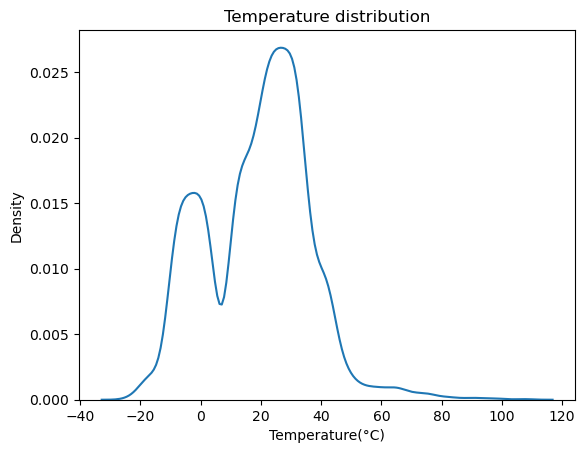

In [50]:
sns.kdeplot(temp_data)
plt.title("Temperature distribution")
plt.xlabel("Temperature(°C)")
plt.show()

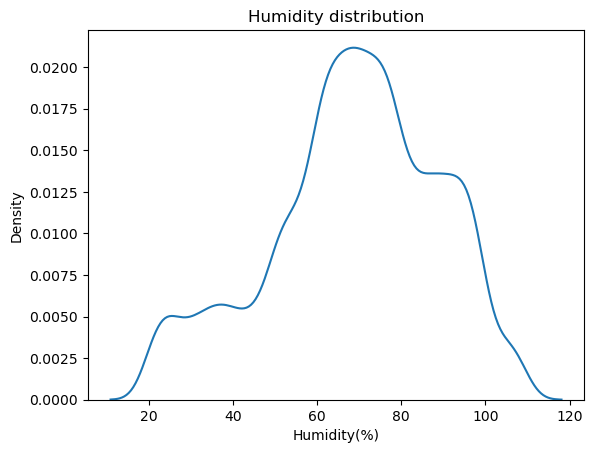

In [51]:
sns.kdeplot(hum_data)
plt.title("Humidity distribution")
plt.xlabel("Humidity(%)")
plt.show()

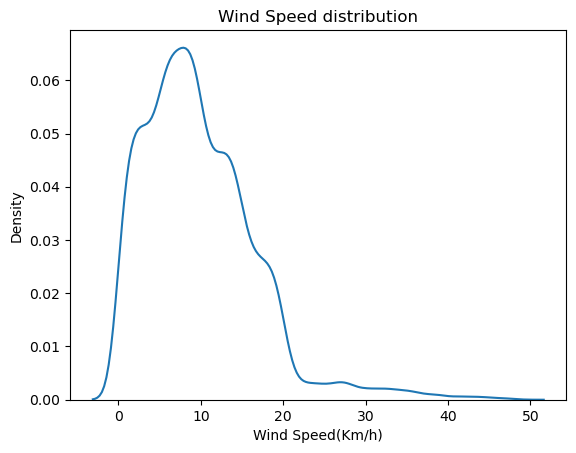

In [52]:
sns.kdeplot(ws_data)
plt.title("Wind Speed distribution")
plt.xlabel("Wind Speed(Km/h)")
plt.show()

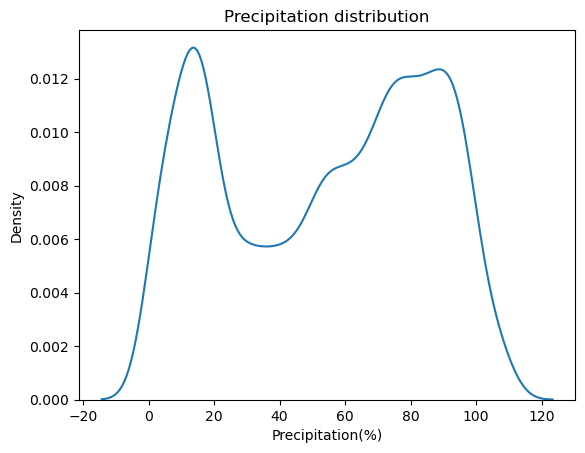

In [53]:
sns.kdeplot(pre_data)
plt.title("Precipitation distribution")
plt.xlabel("Precipitation(%)")
plt.show()

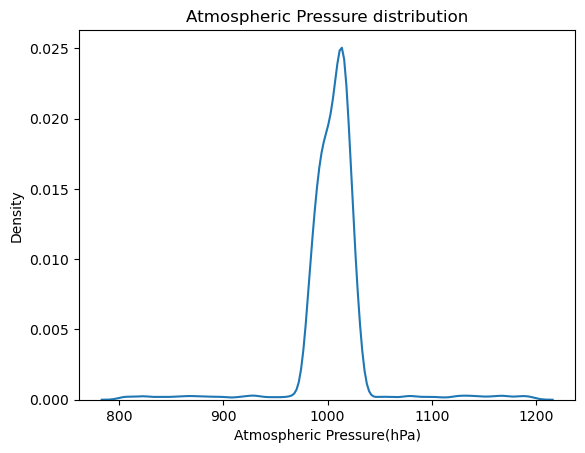

In [54]:
sns.kdeplot(atp_data)
plt.title("Atmospheric Pressure distribution")
plt.xlabel("Atmospheric Pressure(hPa)")
plt.show()

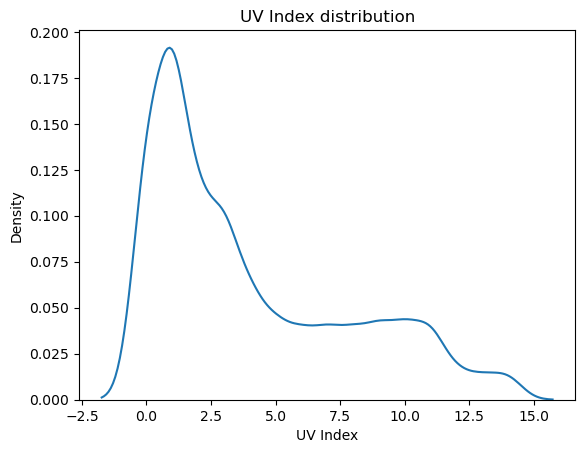

In [55]:
sns.kdeplot(uvi_data)
plt.title("UV Index distribution")
plt.show()

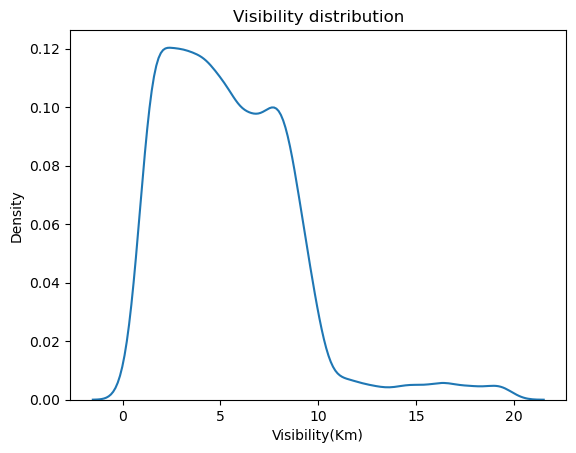

In [56]:
sns.kdeplot(vis_data)
plt.title("Visibility distribution")
plt.xlabel("Visibility(Km)")
plt.show()

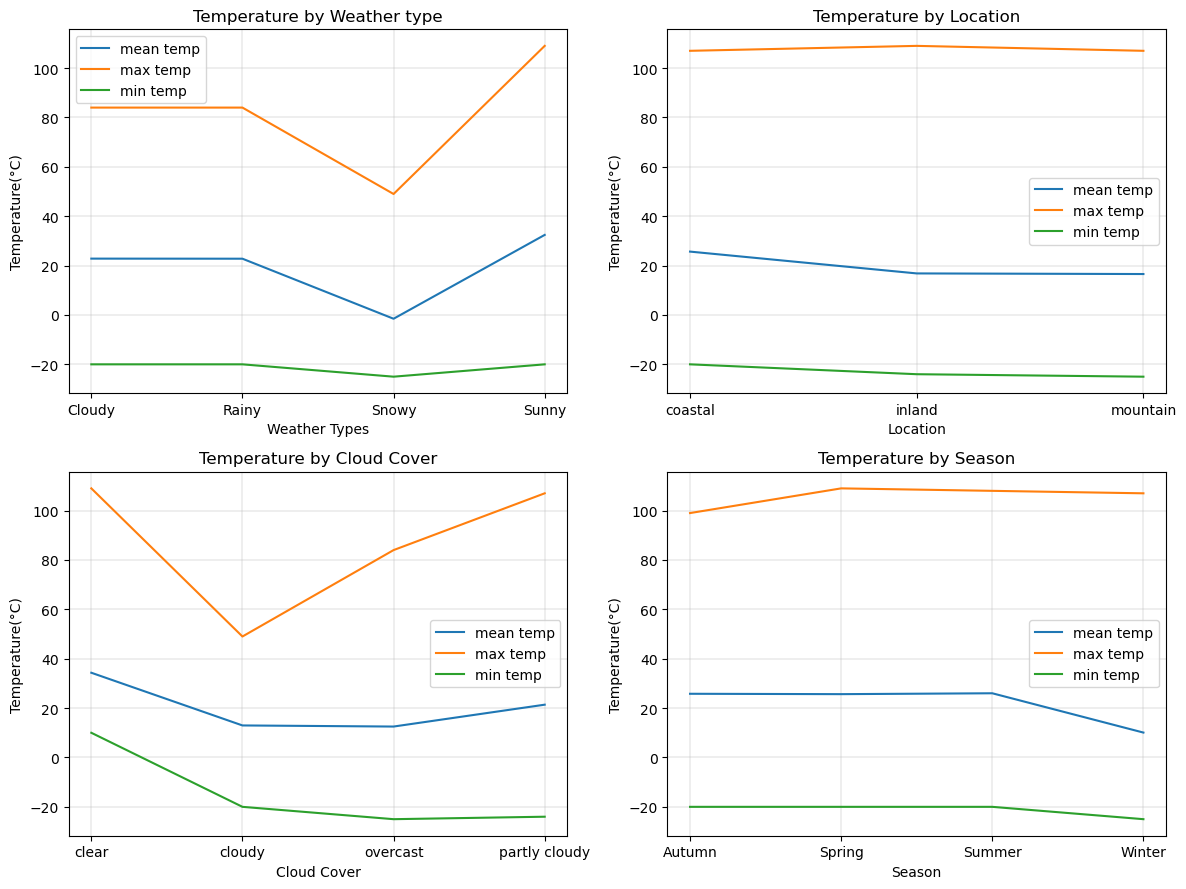

In [57]:
# temperature based on various conditions 
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
list = ["mean temp", "max temp", "min temp"]

# by weather type
axes[0, 0].plot(weather_mean_temp)
axes[0, 0].plot(weather_max_temp)
axes[0, 0].plot(weather_min_temp)
axes[0, 0].set_title("Temperature by Weather type")
axes[0, 0].set_xlabel("Weather Types")
axes[0, 0].set_ylabel("Temperature(°C)")
axes[0, 0].grid(linewidth=0.3, which="major")
axes[0, 0].legend(labels = list, loc="best")


# by location
axes[0, 1].plot(location_mean_temp)
axes[0, 1].plot(location_max_temp)
axes[0, 1].plot(location_min_temp)
axes[0, 1].set_title("Temperature by Location")
axes[0, 1].set_xlabel("Location")
axes[0, 1].set_ylabel("Temperature(°C)")
axes[0, 1].grid(linewidth=0.3, which="major")
axes[0, 1].legend(labels = list, loc="best")


# by cloud cover
axes[1, 0].plot(cc_mean_temp)
axes[1, 0].plot(cc_max_temp)
axes[1, 0].plot(cc_min_temp)
axes[1, 0].set_title("Temperature by Cloud Cover")
axes[1, 0].set_xlabel("Cloud Cover")
axes[1, 0].set_ylabel("Temperature(°C)")
axes[1, 0].grid(linewidth=0.3, which="major")
axes[1, 0].legend(labels = list, loc="best")


# by Season
axes[1, 1].plot(ssn_mean_temp)
axes[1, 1].plot(ssn_max_temp)
axes[1, 1].plot(ssn_min_temp)
axes[1, 1].set_title("Temperature by Season")
axes[1, 1].set_xlabel("Season")
axes[1, 1].set_ylabel("Temperature(°C)")
axes[1, 1].grid(linewidth=0.3, which="major")
axes[1, 1].legend(labels = list, loc="best")



fig.tight_layout()
plt.show()

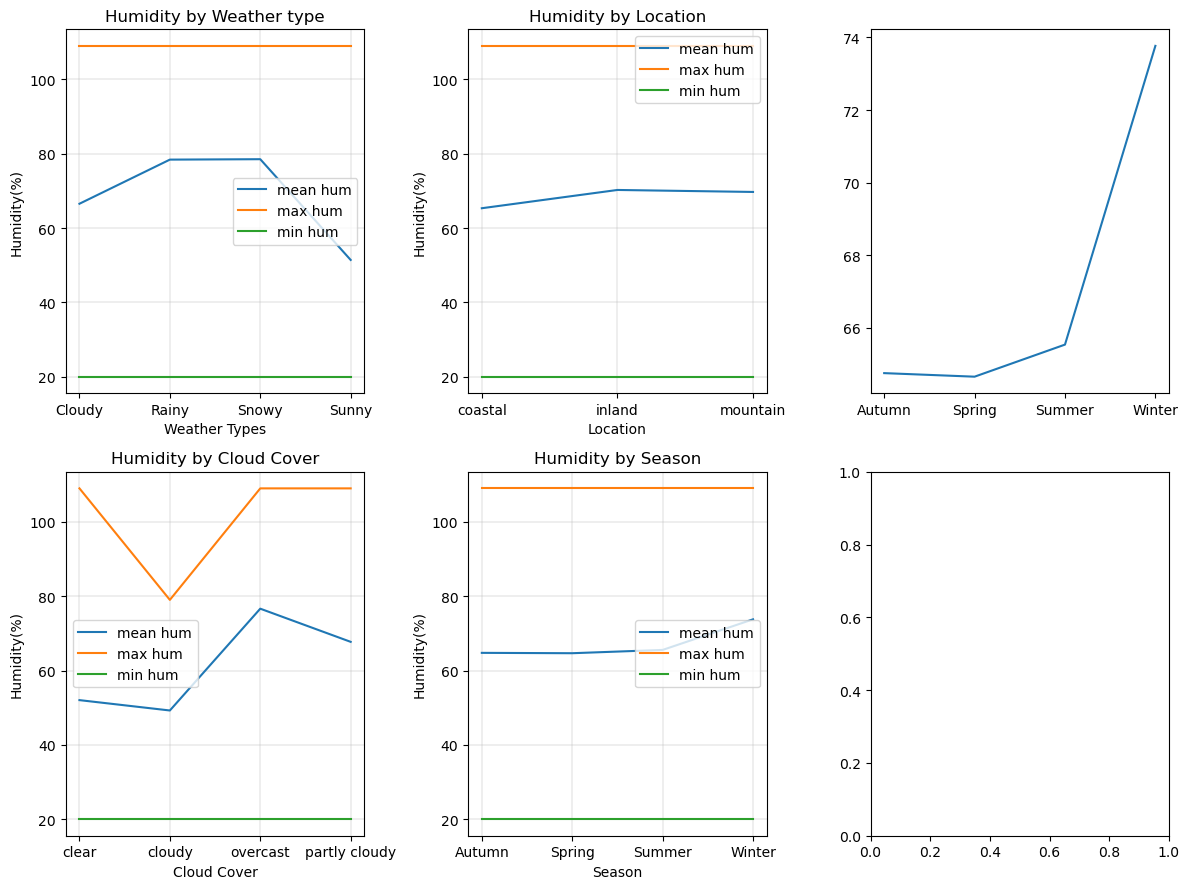

In [138]:
# Humidity based on various conditions 
fig, axes = plt.subplots(2, 3, figsize=(12, 9))
list = ["mean hum", "max hum", "min hum"]

# by weather type
axes[0, 0].plot(weather_mean_hum)
axes[0, 0].plot(weather_max_hum)
axes[0, 0].plot(weather_min_hum)
axes[0, 0].set_title("Humidity by Weather type")
axes[0, 0].set_xlabel("Weather Types")
axes[0, 0].set_ylabel("Humidity(%)")
axes[0, 0].grid(linewidth=0.3, which="major")
axes[0, 0].legend(labels = list, loc="best")


# by location
axes[0, 1].plot(location_mean_hum)
axes[0, 1].plot(location_max_hum)
axes[0, 1].plot(location_min_hum)
axes[0, 1].set_title("Humidity by Location")
axes[0, 1].set_xlabel("Location")
axes[0, 1].set_ylabel("Humidity(%)")
axes[0, 1].grid(linewidth=0.3, which="major")
axes[0, 1].legend(labels = list, loc="best")


# by cloud cover
axes[1, 0].plot(cc_mean_hum)
axes[1, 0].plot(cc_max_hum)
axes[1, 0].plot(cc_min_hum)
axes[1, 0].set_title("Humidity by Cloud Cover")
axes[1, 0].set_xlabel("Cloud Cover")
axes[1, 0].set_ylabel("Humidity(%)")
axes[1, 0].grid(linewidth=0.3, which="major")
axes[1, 0].legend(labels = list, loc="best")


# by Season
axes[1, 1].plot(ssn_mean_hum)
axes[1, 1].plot(ssn_max_hum)
axes[1, 1].plot(ssn_min_hum)
axes[1, 1].set_title("Humidity by Season")
axes[1, 1].set_xlabel("Season")
axes[1, 1].set_ylabel("Humidity(%)")
axes[1, 1].grid(linewidth=0.3, which="major")
axes[1, 1].legend(labels = list, loc="best")


fig.tight_layout()
plt.show()

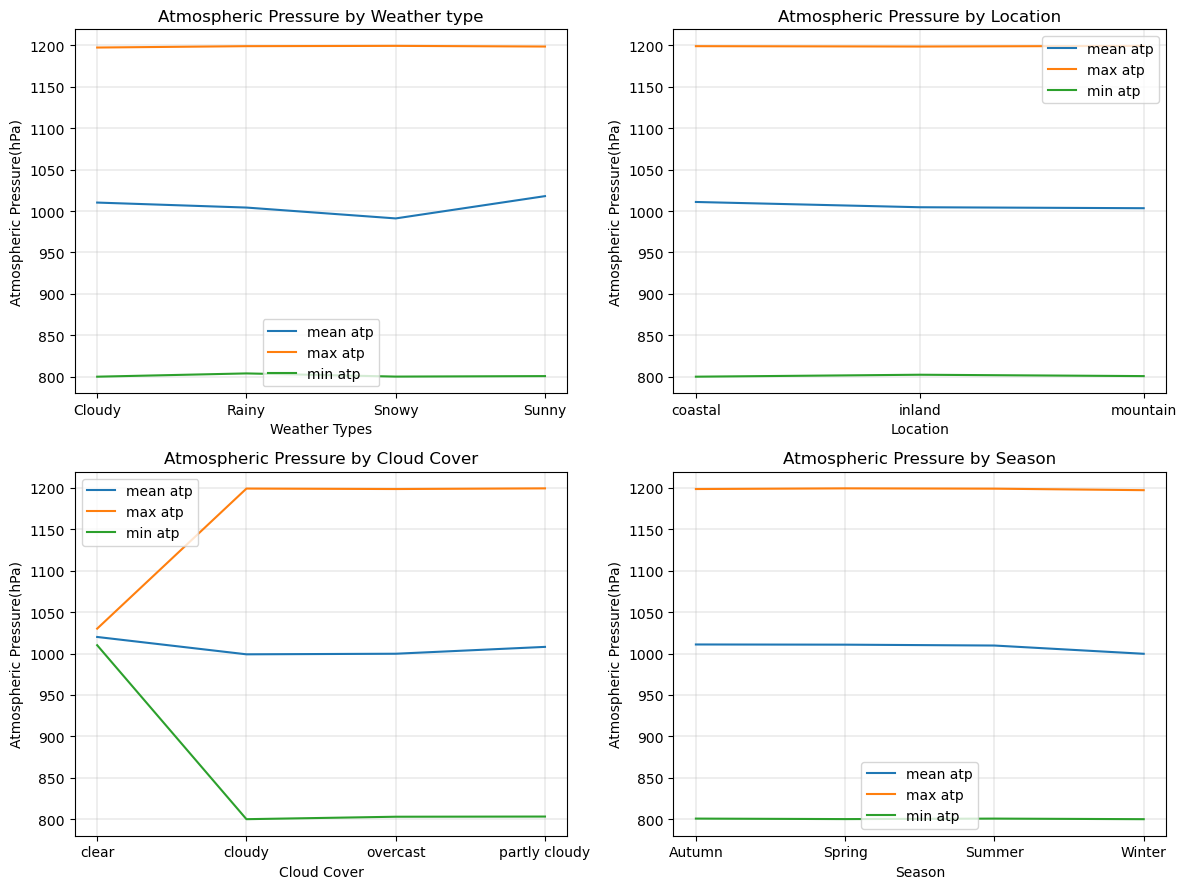

In [136]:
# Atmospheric Pressure based on various conditions 
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
list = ["mean atp", "max atp", "min atp"]

# by weather type
axes[0, 0].plot(weather_mean_atp)
axes[0, 0].plot(weather_max_atp)
axes[0, 0].plot(weather_min_atp)
axes[0, 0].set_title("Atmospheric Pressure by Weather type")
axes[0, 0].set_xlabel("Weather Types")
axes[0, 0].set_ylabel("Atmospheric Pressure(hPa)")
axes[0, 0].grid(linewidth=0.3, which="major")
axes[0, 0].legend(labels = list, loc="best")


# by location
axes[0, 1].plot(location_mean_atp)
axes[0, 1].plot(location_max_atp)
axes[0, 1].plot(location_min_atp)
axes[0, 1].set_title("Atmospheric Pressure by Location")
axes[0, 1].set_xlabel("Location")
axes[0, 1].set_ylabel("Atmospheric Pressure(hPa)")
axes[0, 1].grid(linewidth=0.3, which="major")
axes[0, 1].legend(labels = list, loc="best")


# by cloud cover
axes[1, 0].plot(cc_mean_atp)
axes[1, 0].plot(cc_max_atp)
axes[1, 0].plot(cc_min_atp)
axes[1, 0].set_title("Atmospheric Pressure by Cloud Cover")
axes[1, 0].set_xlabel("Cloud Cover")
axes[1, 0].set_ylabel("Atmospheric Pressure(hPa)")
axes[1, 0].grid(linewidth=0.3, which="major")
axes[1, 0].legend(labels = list, loc="best")


# by Season
axes[1, 1].plot(ssn_mean_atp)
axes[1, 1].plot(ssn_max_atp)
axes[1, 1].plot(ssn_min_atp)
axes[1, 1].set_title("Atmospheric Pressure by Season")
axes[1, 1].set_xlabel("Season")
axes[1, 1].set_ylabel("Atmospheric Pressure(hPa)")
axes[1, 1].grid(linewidth=0.3, which="major")
axes[1, 1].legend(labels = list, loc="best")

axes[1, 1].plot(ssn_mean_atp)

fig.tight_layout()
plt.show()

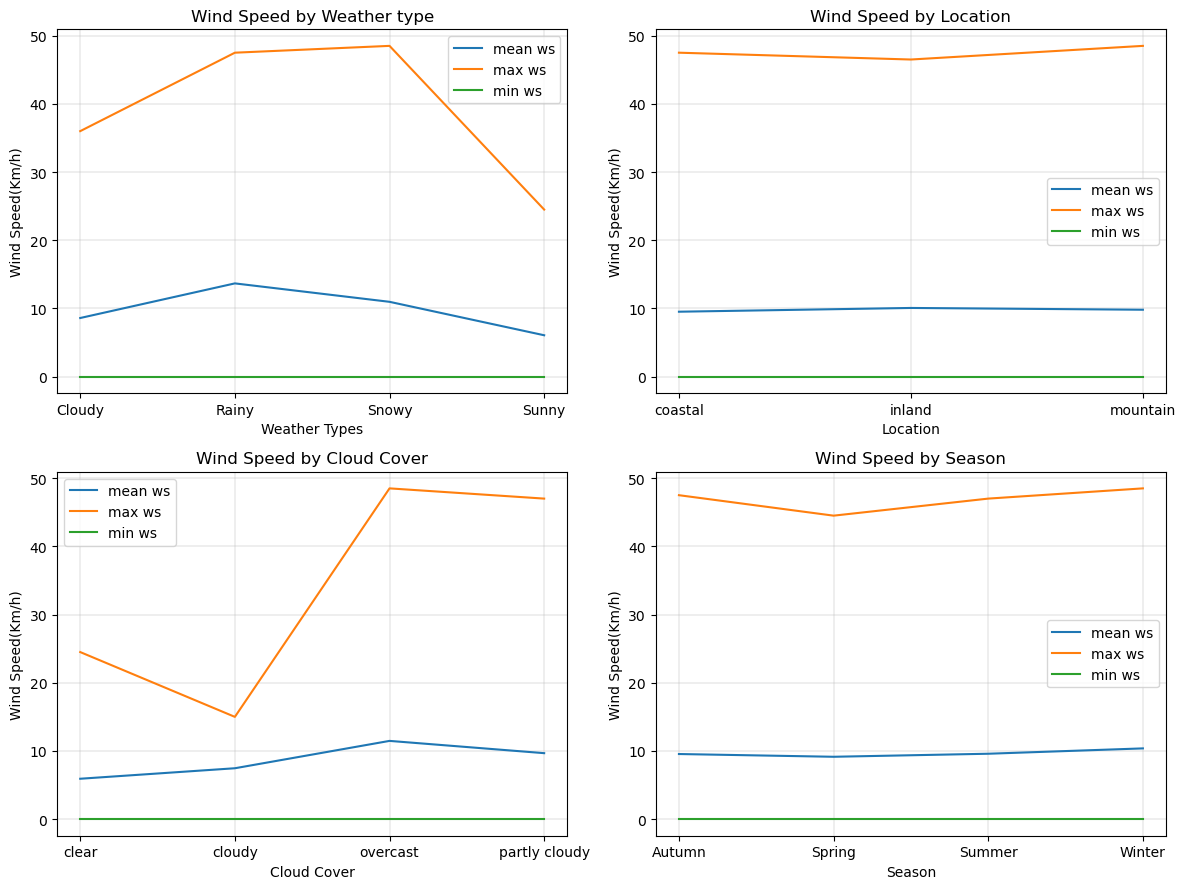

In [60]:
# Wind Speed based on various conditions 
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
list = ["mean ws", "max ws", "min ws"]

# by weather type
axes[0, 0].plot(weather_mean_ws)
axes[0, 0].plot(weather_max_ws)
axes[0, 0].plot(weather_min_ws)
axes[0, 0].set_title("Wind Speed by Weather type")
axes[0, 0].set_xlabel("Weather Types")
axes[0, 0].set_ylabel("Wind Speed(Km/h)")
axes[0, 0].grid(linewidth=0.3, which="major")
axes[0, 0].legend(labels = list)


# by location
axes[0, 1].plot(location_mean_ws)
axes[0, 1].plot(location_max_ws)
axes[0, 1].plot(location_min_ws)
axes[0, 1].set_title("Wind Speed by Location")
axes[0, 1].set_xlabel("Location")
axes[0, 1].set_ylabel("Wind Speed(Km/h)")
axes[0, 1].grid(linewidth=0.3, which="major")
axes[0, 1].legend(labels = list)


# by cloud cover
axes[1, 0].plot(cc_mean_ws)
axes[1, 0].plot(cc_max_ws)
axes[1, 0].plot(cc_min_ws)
axes[1, 0].set_title("Wind Speed by Cloud Cover")
axes[1, 0].set_xlabel("Cloud Cover")
axes[1, 0].set_ylabel("Wind Speed(Km/h)")
axes[1, 0].grid(linewidth=0.3, which="major")
axes[1, 0].legend(labels = list)


# by Season
axes[1, 1].plot(ssn_mean_ws)
axes[1, 1].plot(ssn_max_ws)
axes[1, 1].plot(ssn_min_ws)
axes[1, 1].set_title("Wind Speed by Season")
axes[1, 1].set_xlabel("Season")
axes[1, 1].set_ylabel("Wind Speed(Km/h)")
axes[1, 1].grid(linewidth=0.3, which="major")
axes[1, 1].legend(labels = list)



fig.tight_layout()
plt.show()

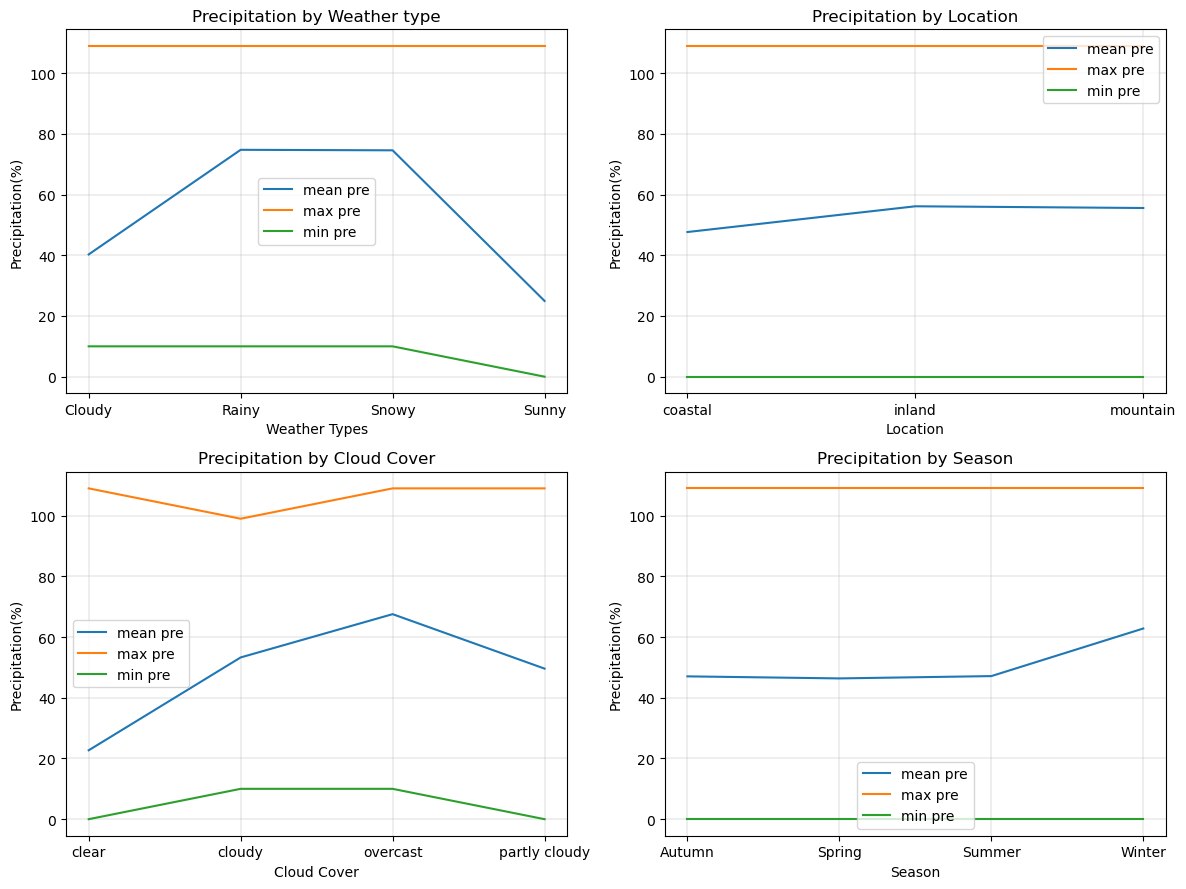

In [61]:
# Precipitation based on various conditions 
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
list = ["mean pre", "max pre", "min pre"]

# by weather type
axes[0, 0].plot(weather_mean_pre)
axes[0, 0].plot(weather_max_pre)
axes[0, 0].plot(weather_min_pre)
axes[0, 0].set_title("Precipitation by Weather type")
axes[0, 0].set_xlabel("Weather Types")
axes[0, 0].set_ylabel("Precipitation(%)")
axes[0, 0].grid(linewidth=0.3, which="major")
axes[0, 0].legend(labels = list)


# by location
axes[0, 1].plot(location_mean_pre)
axes[0, 1].plot(location_max_pre)
axes[0, 1].plot(location_min_pre)
axes[0, 1].set_title("Precipitation by Location")
axes[0, 1].set_xlabel("Location")
axes[0, 1].set_ylabel("Precipitation(%)")
axes[0, 1].grid(linewidth=0.3, which="major")
axes[0, 1].legend(labels = list)


# by cloud cover
axes[1, 0].plot(cc_mean_pre)
axes[1, 0].plot(cc_max_pre)
axes[1, 0].plot(cc_min_pre)
axes[1, 0].set_title("Precipitation by Cloud Cover")
axes[1, 0].set_xlabel("Cloud Cover")
axes[1, 0].set_ylabel("Precipitation(%)")
axes[1, 0].grid(linewidth=0.3, which="major")
axes[1, 0].legend(labels = list)


# by Season
axes[1, 1].plot(ssn_mean_pre)
axes[1, 1].plot(ssn_max_pre)
axes[1, 1].plot(ssn_min_pre)
axes[1, 1].set_title("Precipitation by Season")
axes[1, 1].set_xlabel("Season")
axes[1, 1].set_ylabel("Precipitation(%)")
axes[1, 1].grid(linewidth=0.3, which="major")
axes[1, 1].legend(labels = list)



fig.tight_layout()
plt.show()

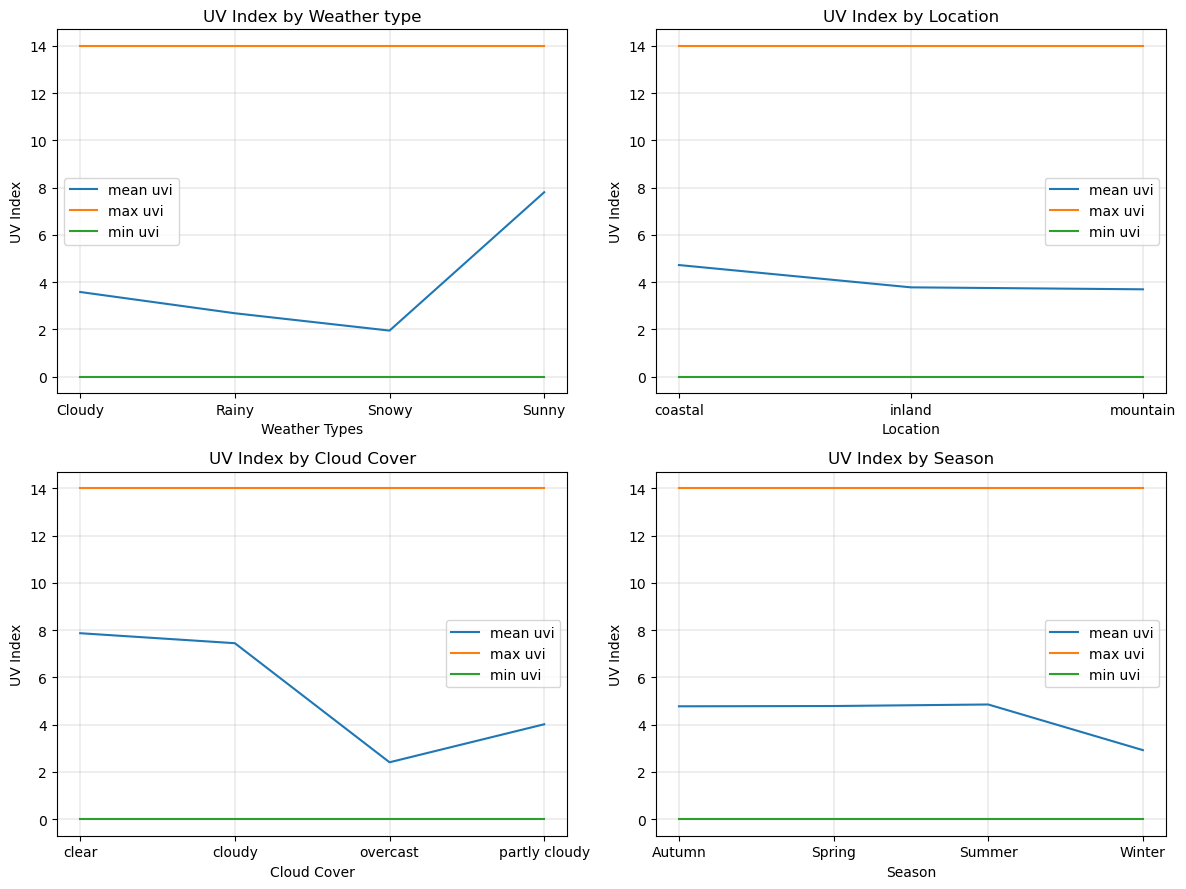

In [62]:
# UV Index based on various conditions 
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
list = ["mean uvi", "max uvi", "min uvi"]

# by weather type
axes[0, 0].plot(weather_mean_uvi)
axes[0, 0].plot(weather_max_uvi)
axes[0, 0].plot(weather_min_uvi)
axes[0, 0].set_title("UV Index by Weather type")
axes[0, 0].set_xlabel("Weather Types")
axes[0, 0].set_ylabel("UV Index")
axes[0, 0].grid(linewidth=0.3, which="major")
axes[0, 0].legend(labels = list)


# by location
axes[0, 1].plot(location_mean_uvi)
axes[0, 1].plot(location_max_uvi)
axes[0, 1].plot(location_min_uvi)
axes[0, 1].set_title("UV Index by Location")
axes[0, 1].set_xlabel("Location")
axes[0, 1].set_ylabel("UV Index")
axes[0, 1].grid(linewidth=0.3, which="major")
axes[0, 1].legend(labels = list)


# by cloud cover
axes[1, 0].plot(cc_mean_uvi)
axes[1, 0].plot(cc_max_uvi)
axes[1, 0].plot(cc_min_uvi)
axes[1, 0].set_title("UV Index by Cloud Cover")
axes[1, 0].set_xlabel("Cloud Cover")
axes[1, 0].set_ylabel("UV Index")
axes[1, 0].grid(linewidth=0.3, which="major")
axes[1, 0].legend(labels = list)


# by Season
axes[1, 1].plot(ssn_mean_uvi)
axes[1, 1].plot(ssn_max_uvi)
axes[1, 1].plot(ssn_min_uvi)
axes[1, 1].set_title("UV Index by Season")
axes[1, 1].set_xlabel("Season")
axes[1, 1].set_ylabel("UV Index")
axes[1, 1].grid(linewidth=0.3, which="major")
axes[1, 1].legend(labels = list)



fig.tight_layout()
plt.show()

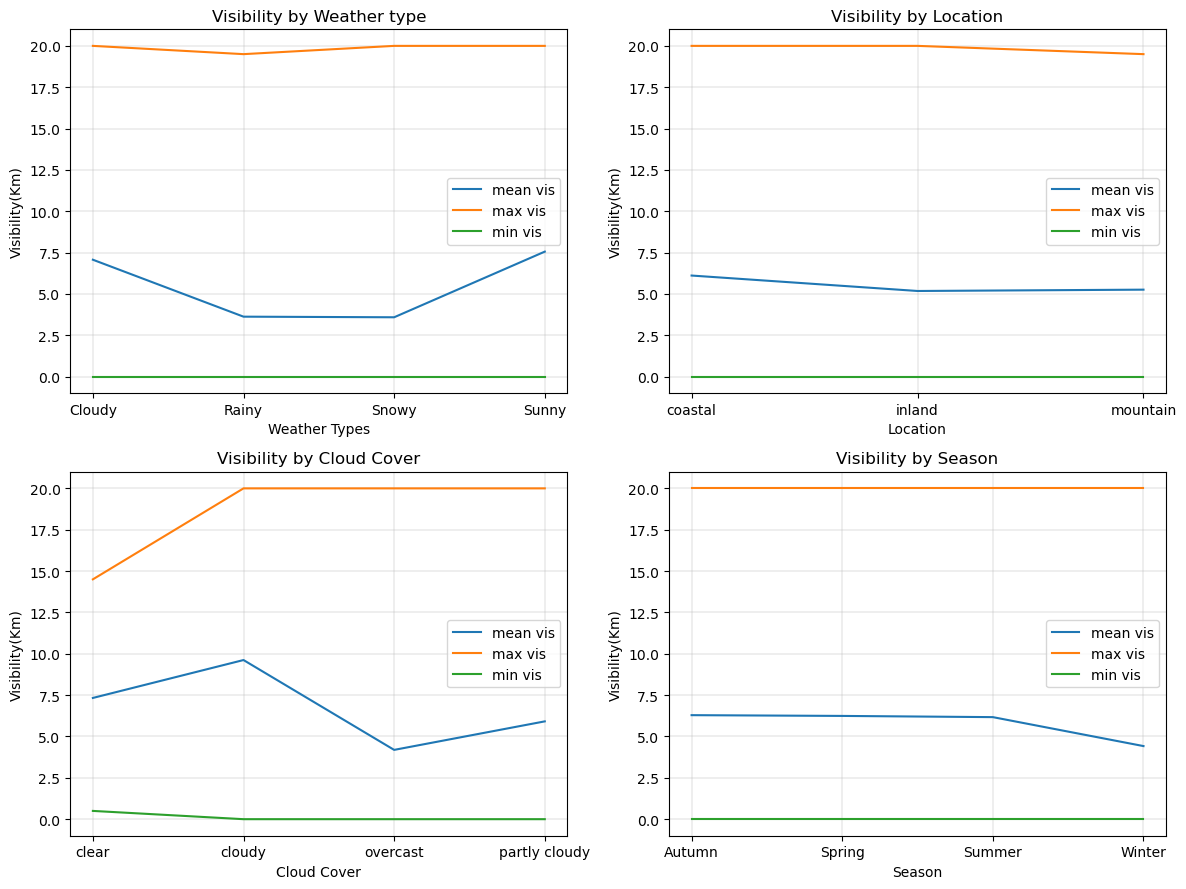

In [126]:
# Visibility based on various conditions 
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
list = ["mean vis", "max vis", "min vis"]

# by weather type
axes[0, 0].plot(weather_mean_vis)
axes[0, 0].plot(weather_max_vis)
axes[0, 0].plot(weather_min_vis)
axes[0, 0].set_title("Visibility by Weather type")
axes[0, 0].set_xlabel("Weather Types")
axes[0, 0].set_ylabel("Visibility(Km)")
axes[0, 0].grid(linewidth=0.3, which="major")
axes[0, 0].legend(labels = list)


# by location
axes[0, 1].plot(location_mean_vis)
axes[0, 1].plot(location_max_vis)
axes[0, 1].plot(location_min_vis)
axes[0, 1].set_title("Visibility by Location")
axes[0, 1].set_xlabel("Location")
axes[0, 1].set_ylabel("Visibility(Km)")
axes[0, 1].grid(linewidth=0.3, which="major")
axes[0, 1].legend(labels = list)


# by cloud cover
axes[1, 0].plot(cc_mean_vis)
axes[1, 0].plot(cc_max_vis)
axes[1, 0].plot(cc_min_vis)
axes[1, 0].set_title("Visibility by Cloud Cover")
axes[1, 0].set_xlabel("Cloud Cover")
axes[1, 0].set_ylabel("Visibility(Km)")
axes[1, 0].grid(linewidth=0.3, which="major")
axes[1, 0].legend(labels = list)


# by Season
axes[1, 1].plot(ssn_mean_vis)
axes[1, 1].plot(ssn_max_vis)
axes[1, 1].plot(ssn_min_vis)
axes[1, 1].set_title("Visibility by Season")
axes[1, 1].set_xlabel("Season")
axes[1, 1].set_ylabel("Visibility(Km)")
axes[1, 1].grid(linewidth=0.3, which="major")
axes[1, 1].legend(labels = list)



fig.tight_layout()
plt.show()

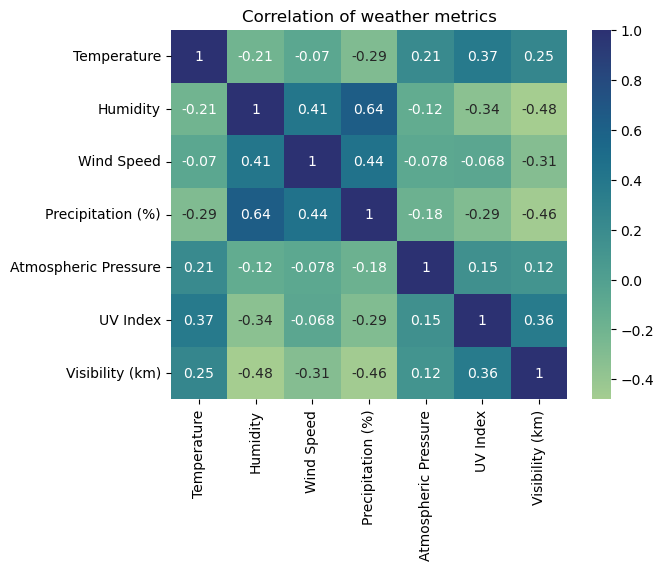

In [64]:
corr_data = weather_data.drop(columns= weather_data.columns[[4, 7, 9, -1]]).corr()
sns.heatmap(corr_data, cmap="crest", annot=True)
plt.title("Correlation of weather metrics")
plt.savefig("corre.png")
plt.show()

In [65]:
corr_data

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
Temperature,1.000000,-0.207969,-0.070022,-0.287206,0.209188,0.374773,0.250751
Humidity,-0.207969,1.000000,0.406079,0.638631,-0.120653,-0.342694,-0.479969
Wind Speed,-0.070022,0.406079,1.000000,0.443770,-0.077757,-0.068147,-0.311828
Precipitation (%),-0.287206,0.638631,0.443770,1.000000,-0.177444,-0.291601,-0.457444
Atmospheric Pressure,0.209188,-0.120653,-0.077757,-0.177444,1.000000,0.154128,0.120182
UV Index,0.374773,-0.342694,-0.068147,-0.291601,0.154128,1.000000,0.362922
Visibility (km),0.250751,-0.479969,-0.311828,-0.457444,0.120182,0.362922,1.000000


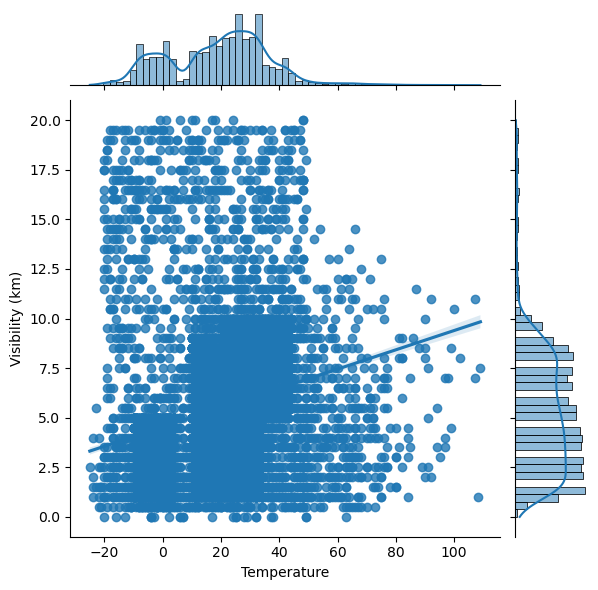

In [66]:
sns.jointplot(x="Temperature", y="Visibility (km)", data=weather_data, kind="reg")
plt.show()

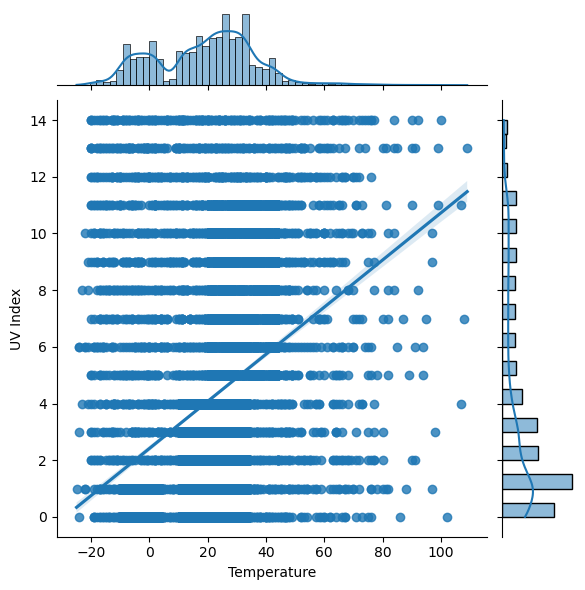

In [67]:
sns.jointplot(x="Temperature", y="UV Index", data=weather_data, kind="reg")
plt.show()

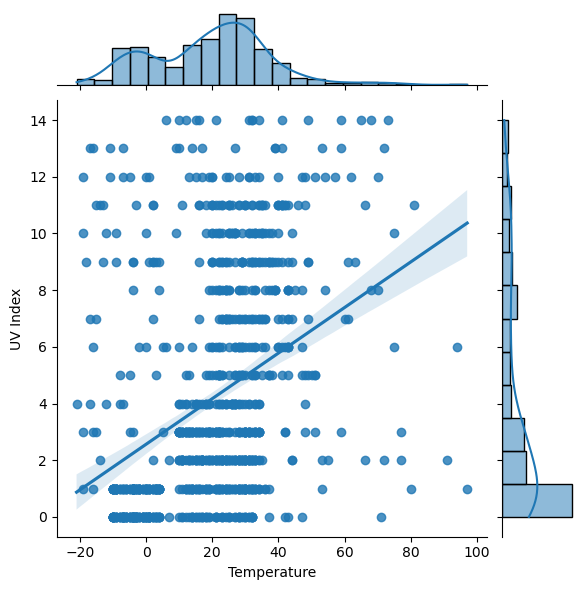

In [68]:
sample_data = weather_data.sample(1000)
sns.jointplot(x="Temperature", y="UV Index", data=sample_data, kind="reg")
plt.show()

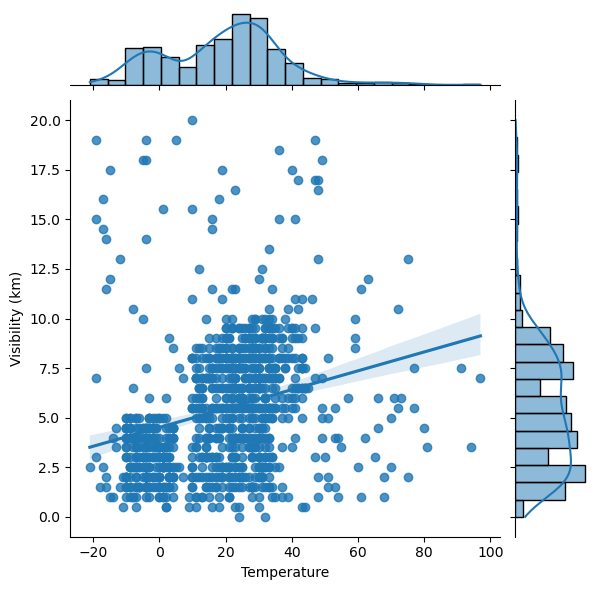

In [69]:
sns.jointplot(x="Temperature", y="Visibility (km)", data=sample_data, kind="reg")
plt.savefig("sample.png")
plt.show()